In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval
import warnings
warnings.filterwarnings('ignore')


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import SparseRandomProjection, GaussianRandomProjection
from sklearn.decomposition import TruncatedSVD
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from scipy.sparse import csr_matrix
from scipy.stats import  kurtosis
from sklearn.decomposition import DictionaryLearning

# Plot customization
plt.rcParams['axes.grid'] = True
plt.style.use('seaborn-colorblind')
plt.rcParams.update({'font.size': 22})

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

data = pd.read_csv('car.data', header=None)
data.columns = ['buying', 'maint','doors', 'persons','lug_boot', 'safety','class']

print("Dataset Shape: ", data.shape)
data.head()

Dataset Shape:  (1728, 7)


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

# Label Encoding
Original Dataset
```
   buying       vhigh, high, med, low
   maint        vhigh, high, med, low
   doors        2, 3, 4, 5more
   persons      2, 4, more
   lug_boot     small, med, big
   safety       low, med, high
   
   class        unacc, acc, good, vgood
```

Encoded Dataset
```
   buying       4, 3, 2, 1
   maint        4, 3, 2, 1
   doors        2, 3, 4, 5
   persons      2, 4, 6
   lug_boot     1, 2, 3
   safety       1, 2, 3
   
   class        0, 1, 2, 3
```
Note: There is no dash symbol in original dataset, only appears in dataset description.

In [4]:
def label_encoding(car_dataset):
    encoded = car_dataset.replace('vhigh', 4).replace('high', 3).replace('med', 2).replace('low', 1)\
    .replace('5more', 5).replace('more', 6).replace('small', 1).replace('big', 3).replace('unacc', 0)\
    .replace('acc', 1).replace('good', 2).replace('vgood', 3)
    return encoded

In [5]:
data = label_encoding(data)
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,2,2,1,1,0
1,4,4,2,2,1,2,0
2,4,4,2,2,1,3,0
3,4,4,2,2,2,1,0
4,4,4,2,2,2,2,0


In [6]:
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve, cross_val_score
from external_fn import plot_learning_curve, plot_validation_curve, plot_roc_auc_curve

from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve, cross_val_score

x = data[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
y = data['class']

# Plot customization
plt.rcParams['axes.grid'] = True
plt.style.use('seaborn-colorblind')

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=42, stratify=y)

In [8]:
from sklearn.metrics import accuracy_score,roc_auc_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [9]:
result = {
    'k-means': {}, 
    'Expectation_Maximization': {},
    'PCA': {},
    'ICA': {},
    'Randomized_Projections': {},
    'Infomation_Gain': {},
    'experiments': [],
    'Step4_Neural_Network': {},
    'Step5_Neural_Network': {},
}

In [10]:
%%time
task = "k-means"

f1 = []
train_acc = []
test_acc = []
params = [4]

for k in params:
    print("K = ", k)
    clf = KMeans(n_clusters=4)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    result[task][k] = {
        "accuracy_score" : accuracy_score(y_test,y_pred),
        # "roc_auc": roc_auc_score(y_test, y_pred,multi_class='ovr'),
        "f1" : f1_score(y_test,y_pred, average='weighted'),
        "training_acc": clf.score(x_train, y_train),
        "testing_acc": clf.score(x_test, y_test),
        "confusion_mat": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test,y_pred),
        # "cross_validation_score": cross_val_score(clf, x, y, cv=10, scoring='roc_auc'),
    }
    print("Accuracy: ", result[task][k]["accuracy_score"])
    # print("ROC AUC score: ", result[task][k]["roc_auc"])
    print("F1 Score: ", result[task][k]["f1"])
    print("Training Accuracy: ", result[task][k]["training_acc"])
    print("Testing Accuracy: ", result[task][k]["testing_acc"])
    print("Confusion Matrix")
    print(result[task][k]["confusion_mat"])
    print("Classification Report")
    print(result[task][k]["classification_report"])
    # print("Cross Validation Score")
    # print(result[task][k]["cross_validation_score"])

    # Add to lists
    f1.append(result[task][k]["f1"])
    train_acc.append(result[task][k]["training_acc"])
    test_acc.append(result[task][k]["testing_acc"])
    
    # plot_learning_curve(clf, f"{task} (k={k})", x, y, axes=None, cv=10, n_jobs=4)
    # plt.savefig(f'mental_plots/learning_curve_{task}_{k}.png')
    # plt.show()
    
# # Validation Curve
# new_params = params
# plot_validation_curve(KMeans(), f"{task}: n_neighbors", x, y, "n_neighbors", new_params, scoring="accuracy", axes=None, cv=10, n_jobs=4)
# plt.savefig(f'mental_plots/validation_curve_{task}.png')
# plt.show()

K =  4
Accuracy:  0.21579961464354527
F1 Score:  0.27946558674663907
Training Accuracy:  -5696.671778187929
Testing Accuracy:  -2435.837508712532
Confusion Matrix
[[86 91 93 93]
 [29 14 51 21]
 [ 8  0  7  6]
 [ 4  0 11  5]]
Classification Report
              precision    recall  f1-score   support

           0       0.68      0.24      0.35       363
           1       0.13      0.12      0.13       115
           2       0.04      0.33      0.08        21
           3       0.04      0.25      0.07        20

    accuracy                           0.22       519
   macro avg       0.22      0.24      0.16       519
weighted avg       0.51      0.22      0.28       519

CPU times: user 60.7 ms, sys: 25.8 ms, total: 86.4 ms
Wall time: 284 ms


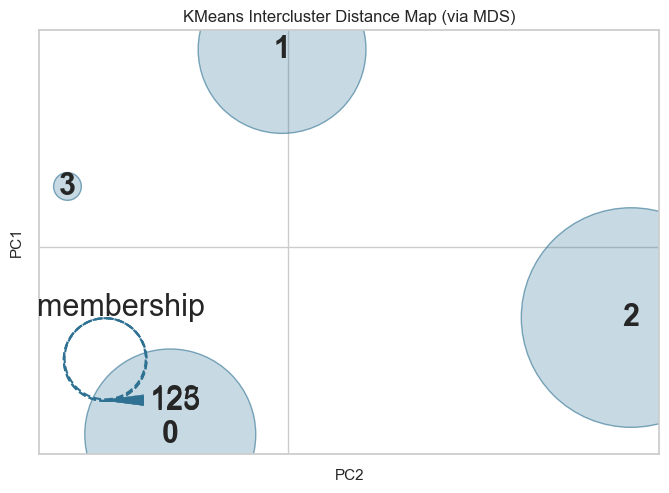

In [11]:
from yellowbrick.cluster import intercluster_distance
from yellowbrick.cluster import silhouette_visualizer

visualizer = intercluster_distance(KMeans(4, random_state=42), x_test)

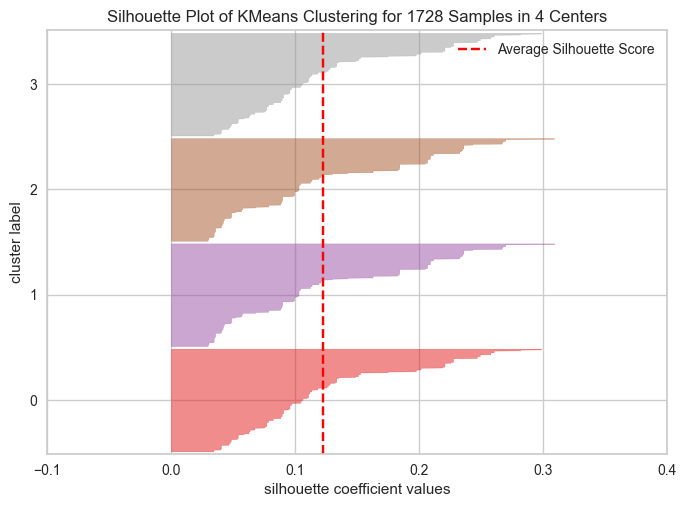

In [63]:
visualizer = silhouette_visualizer(KMeans(4, random_state=42), x)

In [13]:
from external_fn import *

In [60]:
scaler = preprocessing.StandardScaler().fit(x)
X_train = scaler.transform(x)
X_test = scaler.transform(x)

CPU times: user 1e+03 ns, sys: 6 µs, total: 7 µs
Wall time: 13.1 µs


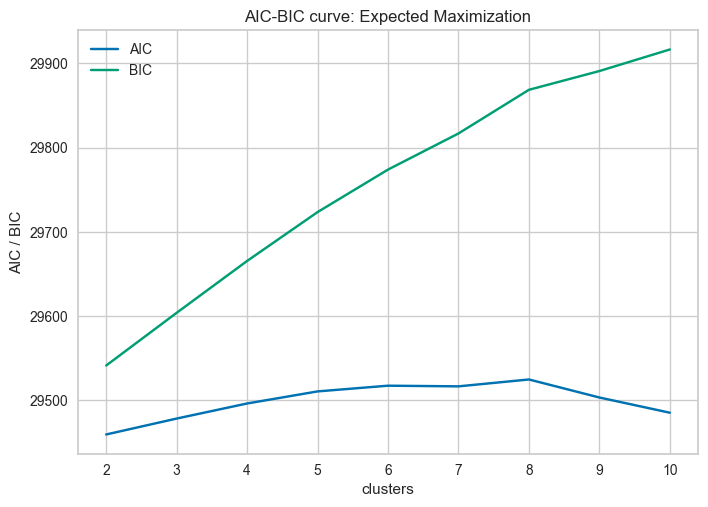

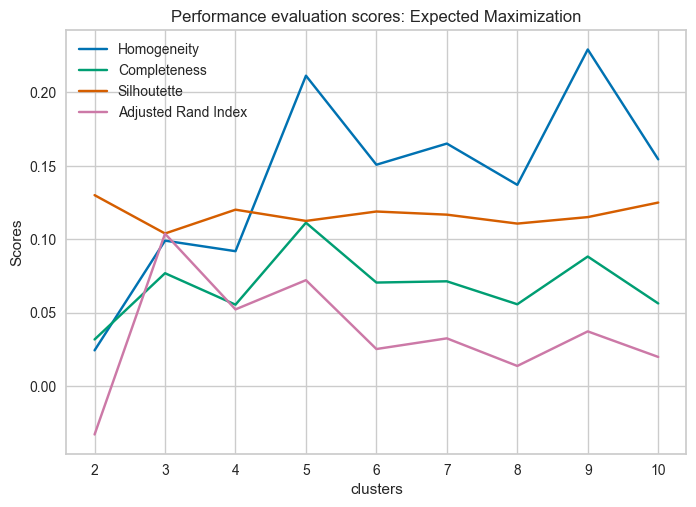

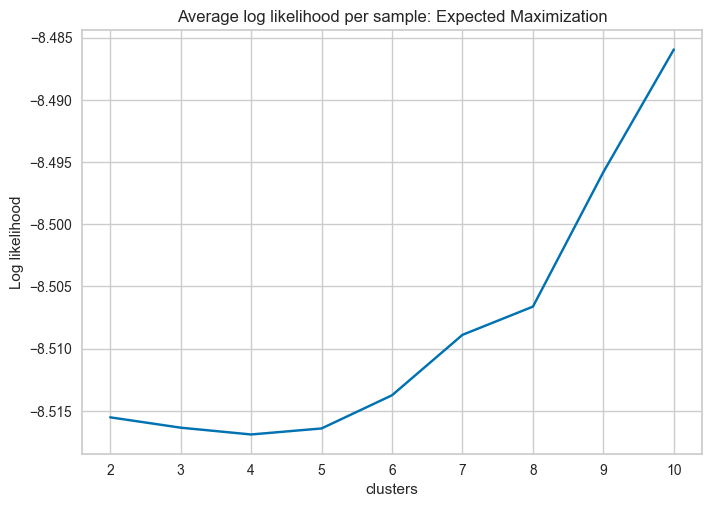

Training accuracy for Expected Maximization for K = 4:  72.74305555555556
Testing accuracy for Expected Maximization for K = 4:  72.74305555555556
accuracy_score 	 0.7274305555555556
f1 	 0.7164152506989273
confusion_mat 	 [[1050  124   23   13]
 [ 212  147   18    7]
 [  37    5   24    3]
 [   8   18    3   36]]
classification_report 	               precision    recall  f1-score   support

           0       0.80      0.87      0.83      1210
           1       0.50      0.38      0.43       384
           2       0.35      0.35      0.35        69
           3       0.61      0.55      0.58        65

    accuracy                           0.73      1728
   macro avg       0.57      0.54      0.55      1728
weighted avg       0.71      0.73      0.72      1728



In [62]:
%time
num_class = 4
means_init = np.array([X_train[y == i].mean(axis=0) for i in range(num_class)])
clf_em = expectation_maximization(X_train, X_test, y, y, init_means = means_init, component_list = [2,3,4,5,6,7,8,9,10], num_class = num_class)

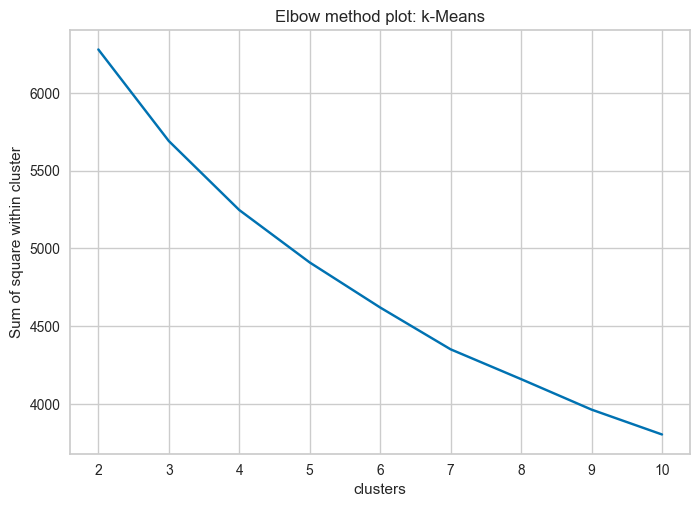

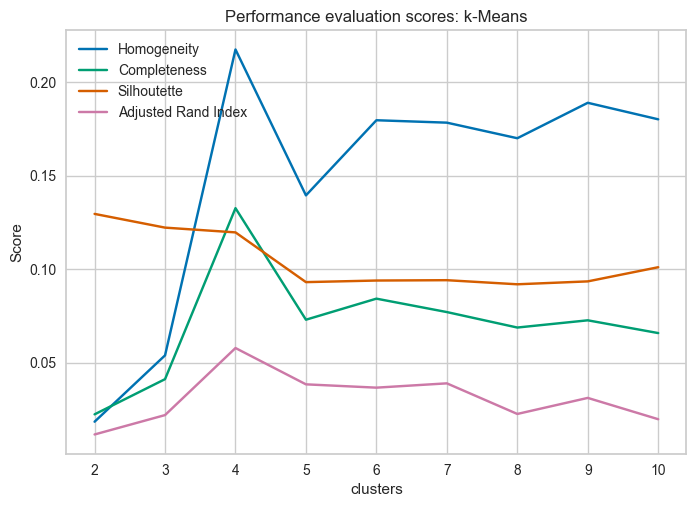

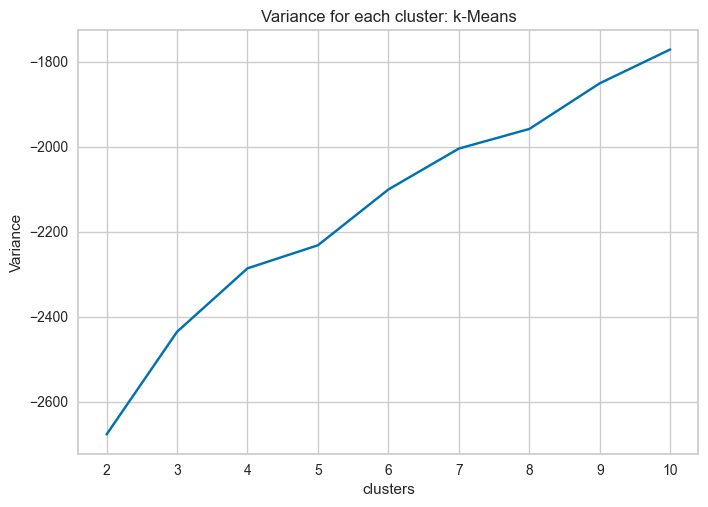

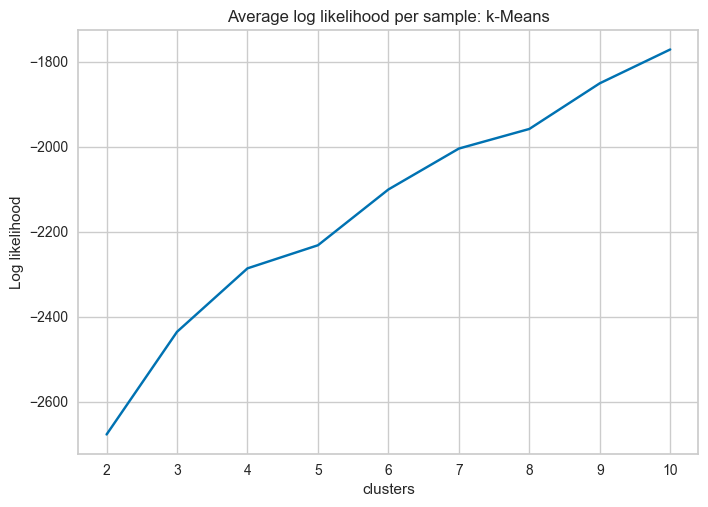

Training accuracy:  k-Means - K = 4:  40.033085194375516
Testing accuracy for  k-Means for K = 4:  36.22350674373796
accuracy_score 	 0.3622350674373796
f1 	 0.43151632580205346
confusion_mat 	 [[115  69 101  78]
 [ 11  49  25  30]
 [  0   5   6  10]
 [  0   2   0  18]]
classification_report 	               precision    recall  f1-score   support

           0       0.91      0.32      0.47       363
           1       0.39      0.43      0.41       115
           2       0.05      0.29      0.08        21
           3       0.13      0.90      0.23        20

    accuracy                           0.36       519
   macro avg       0.37      0.48      0.30       519
weighted avg       0.73      0.36      0.43       519

CPU times: user 9 s, sys: 5.76 s, total: 14.8 s
Wall time: 1min 30s


In [16]:
%%time
clf_kmeans = kmeans(X_train, X_test, y_train, y_test, init_means = means_init, component_list = [2,3,4,5,6,7,8,9,10], num_class = num_class)

# Dimensionality Reduction

## PCA

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def fit_random_forest_classifier(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
    # clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_preds = clf.predict(X_test)
    acc = accuracy_score(y_test, y_preds)
    return acc

In [18]:
from sklearn.decomposition import PCA

x=StandardScaler().fit_transform(x)
pca_accs=[]
pca_comps=[]
pca_reconstruction_error=[]
pca_variance_explained_raw=[]
pca_variance_explained=[]
for comp in range(2,7):
    pca=PCA(comp)
    x_pca=pca.fit_transform(x)
    acc=fit_random_forest_classifier(x_pca, y)
    pca_variance_explained_raw.append(pca.explained_variance_ratio_)
    pca_variance_explained.append(np.sum(pca.explained_variance_ratio_))
    pca_comps.append(comp)
    pca_accs.append(acc)
    X_projected = pca.inverse_transform(x_pca)
    pca_reconstruction_error.append(((x - X_projected) ** 2).mean())

In [19]:
pca_variance_explained_raw[-1]

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

Text(0.5, 1.0, 'PCA: Reconstruction error')

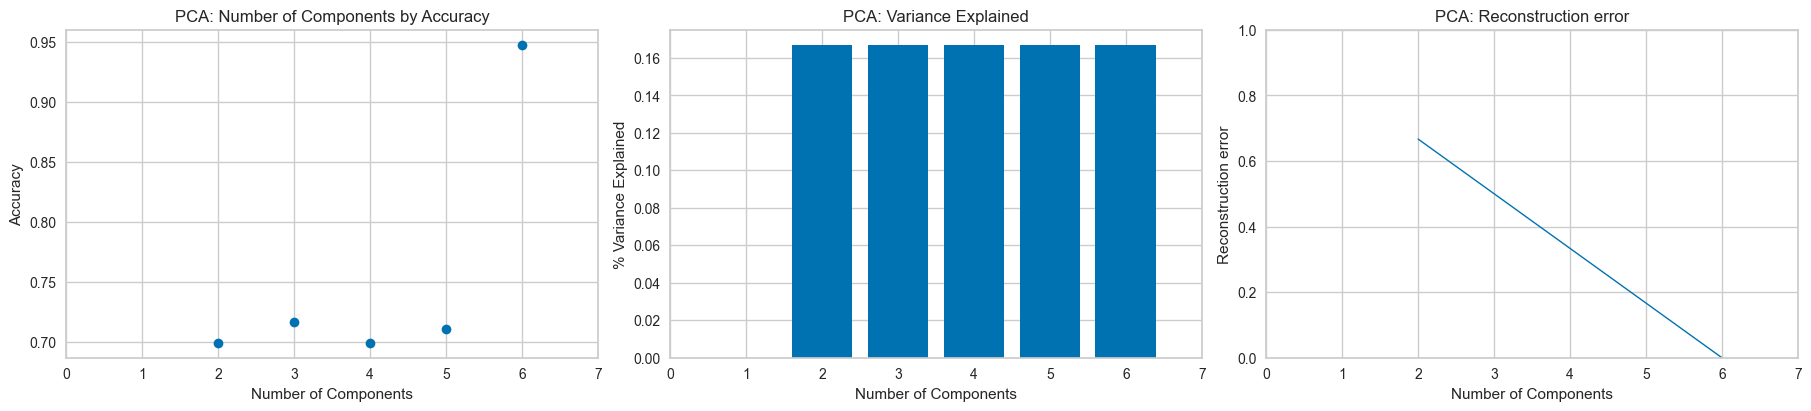

In [20]:
fig, axs = plt.subplots(1 , 3,figsize=(18, 4), constrained_layout=True,)
axs[0].plot(pca_comps,pca_accs,'o')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Number of Components')
axs[0].set_xlim(0,7)
axs[0].set_title('PCA: Number of Components by Accuracy')

axs[1].bar(pca_comps, pca_variance_explained_raw[-1][:-1], linewidth= 1)
axs[1].set_ylabel('% Variance Explained')
axs[1].set_xlabel('Number of Components')
axs[1].set_xlim(0,7)
axs[1].set_title('PCA: Variance Explained')

axs[2].plot(pca_comps, pca_reconstruction_error, linewidth= 1)
axs[2].set_ylabel('Reconstruction error')
axs[2].set_xlabel('Number of Components')
axs[2].set_xlim(0,7)
axs[2].set_ylim(0,1)
axs[2].set_title('PCA: Reconstruction error')

# for ax in axs.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')
# plt.plot(pca_comps,pca_accs,'o')
# plt.ylabel('Accuracy')
# plt.xlabel('Number of Components')
# plt.xlim(0,7)
# plt.title('Number of Components by Accuracy')

# plt.plot(pca_comps, pca_reconstruction_error, linewidth= 1)
# # ax2.axvline(gridSearch.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen', linewidth = 2)
# plt.xlabel('Number of Components')
# plt.ylabel('Reconstruction Error')
# plt.title('Reconstruction error')
# plt.xlim(0,7)
# plt.show()


In [21]:
# Best PCA
np.max(pca_accs),pca_comps[np.where(pca_accs == np.max(pca_accs))[0][0]]

(0.9479768786127167, 6)

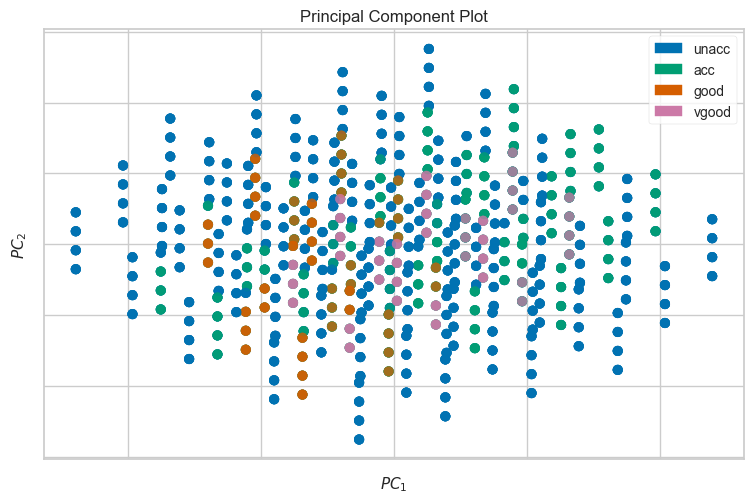

<AxesSubplot: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [22]:
from yellowbrick.features import PCA

classes = ["unacc", "acc", "good", "vgood"]
visualizer = PCA(scale=True, classes=classes)
visualizer.fit_transform(x, y)
visualizer.show()

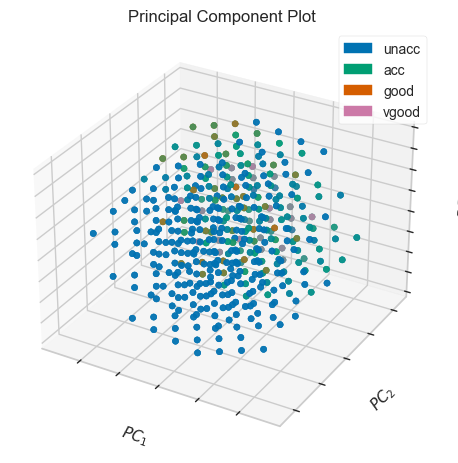

<Axes3DSubplot: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$', zlabel='$PC_3$'>

In [23]:
visualizer = PCA(scale=True, projection=3, classes=classes, alpha=0.5)
visualizer.fit_transform(x, y)
visualizer.show()

## ICA

In [24]:
from scipy.stats import kurtosis

ica_accs=[]
ica_comps=[]
ica_reconstruction_error=[]
ica_kurtosis_raw=[]
ica_kurtosis=[]
for comp in range(1,7):
    ica=FastICA(comp)
    x_ica=ica.fit_transform(x)
    acc=fit_random_forest_classifier(x_ica, y)
    ica_kurtosis_raw.append(kurtosis(x_ica))
    ica_kurtosis.append(np.mean(np.abs(kurtosis(x_ica))))
    ica_comps.append(comp)
    ica_accs.append(acc)
    X_projected = ica.inverse_transform(x_ica)
    ica_reconstruction_error.append(((x - X_projected) ** 2).mean())

Text(0.5, 1.0, 'ICA: Reconstruction error')

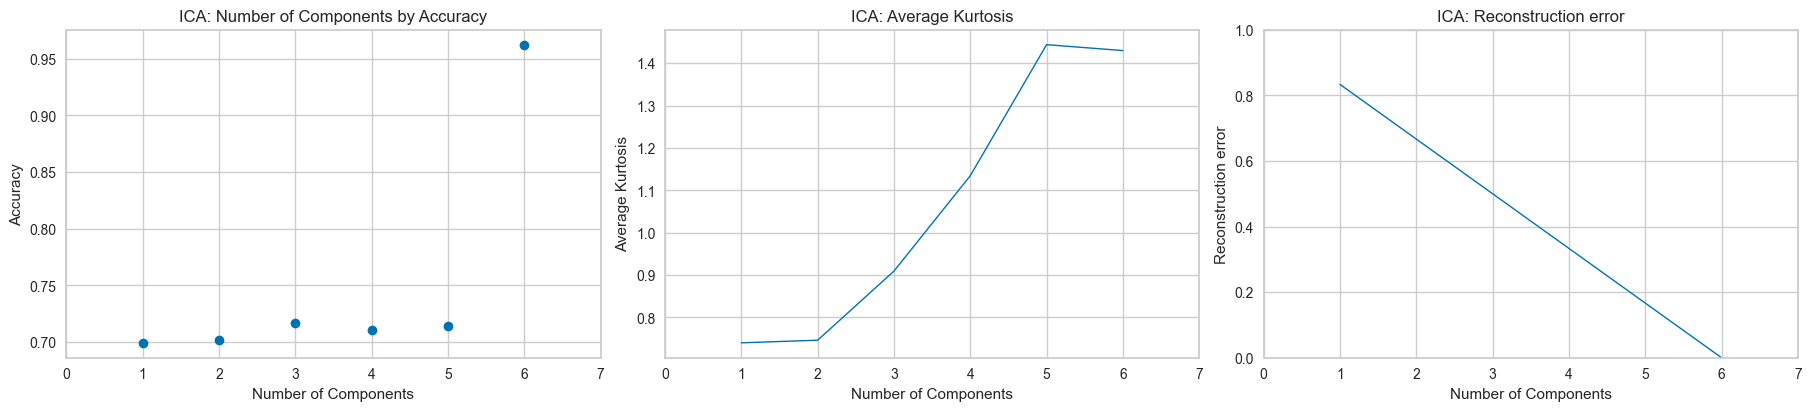

In [25]:
fig, axs = plt.subplots(1 , 3,figsize=(18, 4), constrained_layout=True,)
axs[0].plot(ica_comps,ica_accs,'o')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Number of Components')
axs[0].set_xlim(0,7)
axs[0].set_title('ICA: Number of Components by Accuracy')

axs[1].plot(ica_comps, ica_kurtosis, linewidth= 1)
axs[1].set_ylabel('Average Kurtosis')
axs[1].set_xlabel('Number of Components')
axs[1].set_xlim(0,7)
axs[1].set_title('ICA: Average Kurtosis')

axs[2].plot(ica_comps, ica_reconstruction_error, linewidth= 1)
axs[2].set_ylabel('Reconstruction error')
axs[2].set_xlabel('Number of Components')
axs[2].set_xlim(0,7)
axs[2].set_ylim(0,1)
axs[2].set_title('ICA: Reconstruction error')


In [26]:
# Best ICA
np.max(ica_accs),ica_comps[np.where(ica_accs == np.max(ica_accs))[0][0]]

(0.9624277456647399, 6)

## Randomized Projection

In [27]:
from sklearn.random_projection import SparseRandomProjection

rp_losses=[]
rp_accs = []

for i in range(1,7):
    random_projection = SparseRandomProjection(n_components=i, random_state=42)
    random_projection.fit(x)
    components =  random_projection.components_.toarray()
    p_inverse = np.linalg.pinv(components.T)
    #now get the transformed data using the projection components
    reduced_data = random_projection.transform(x)
    acc=fit_random_forest_classifier(reduced_data, y)
    rp_accs.append(acc)
    reconstructed= reduced_data.dot(p_inverse)
    error = metrics.mean_squared_error(x, reconstructed)
    rp_losses.append(error)
    

Text(0.5, 1.0, 'Randomized Projection: Reconstruction error')

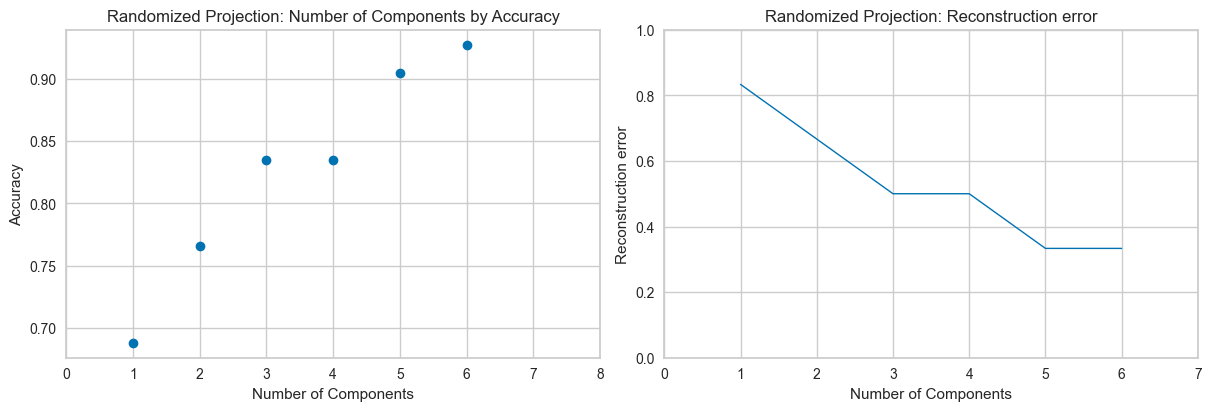

In [28]:
fig, axs = plt.subplots(1 , 2,figsize=(12, 4), constrained_layout=True,)
axs[0].plot(range(1,7),rp_accs,'o')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Number of Components')
axs[0].set_xlim(0,8)
axs[0].set_title('Randomized Projection: Number of Components by Accuracy')

axs[1].plot(range(1,7),rp_losses, linewidth= 1)
axs[1].set_ylabel('Reconstruction error')
axs[1].set_xlabel('Number of Components')
axs[1].set_xlim(0,7)
axs[1].set_ylim(0,1)
axs[1].set_title('Randomized Projection: Reconstruction error')

Text(0.5, 1.0, 'Randomized Projection: Reconstruction error (run 10 times)')

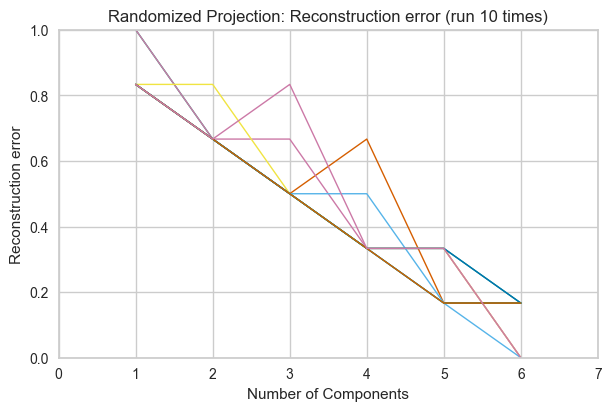

In [88]:
rrp_losses=[]
rrp_losses_list=[]
rrp_accs = []

fig, axs = plt.subplots(1 , 1,figsize=(6, 4), constrained_layout=True,)

for j in range(10):
    rrp_losses=[]
    for i in range(1,7):
        random_projection = SparseRandomProjection(n_components=i, compute_inverse_components=True)
        reduced_data = random_projection.fit_transform(x)
        reconstructed= random_projection.inverse_transform(reduced_data)
        error = metrics.mean_squared_error(x, reconstructed)
        rrp_losses.append(error)
    rrp_losses_list.append(rrp_losses)
    axs.plot(range(1,7),rrp_losses, linewidth= 1)
axs.set_ylabel('Reconstruction error')
axs.set_xlabel('Number of Components')
axs.set_xlim(0,7)
axs.set_ylim(0,1)
axs.set_title('Randomized Projection: Reconstruction error (run 10 times)')

In [89]:
np.var(rrp_losses_list)

0.07422839506172858

In [29]:
from sklearn.random_projection import GaussianRandomProjection

def inverse_transform_rp(rp, X_transformed, X_train):

	return X_transformed.dot(rp.components_) + np.mean(X_train, axis = 0)


accs = []
reconstruction_error = []
for i in range(1,7):
	rp = GaussianRandomProjection(n_components = comp)
	X_transformed = rp.fit_transform(x)
	X_projected = inverse_transform_rp(rp, X_transformed, x)
	reconstruction_error.append(((x - X_projected) ** 2).mean())
	accs.append(fit_random_forest_classifier(X_transformed, y))

# fig2,ax2 = plt.subplots()
# ax2.plot(range(1,7), reconstruction_error, linewidth= 2)
# ax2.axvline(gridSearch.best_estimator_.named_steps['rp'].n_components, linestyle=':', label='n_components chosen', linewidth = 2)
# plt.axis('tight')
# plt.xlabel('Number of components')
# plt.ylabel('Reconstruction Error')
# plt.title('Reconstruction error for n_components chosen %f '%chosen_error)
# plt.show()

Text(0.5, 1.0, 'Randomized Projection: Reconstruction error')

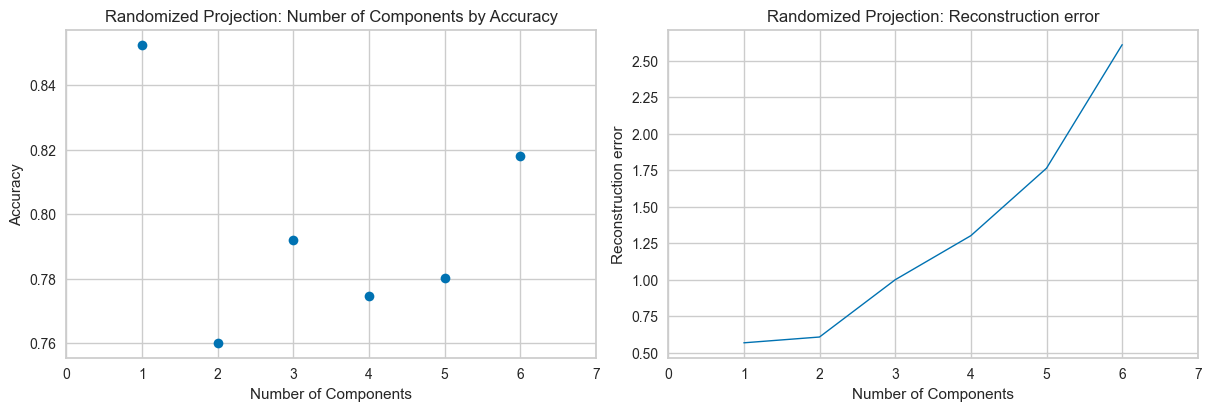

In [30]:
fig, axs = plt.subplots(1 , 2,figsize=(12, 4), constrained_layout=True,)
axs[0].plot(range(1,7),accs,'o')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Number of Components')
axs[0].set_xlim(0,7)
axs[0].set_title('Randomized Projection: Number of Components by Accuracy')

axs[1].plot(range(1,7),reconstruction_error, linewidth= 1)
axs[1].set_ylabel('Reconstruction error')
axs[1].set_xlabel('Number of Components')
axs[1].set_xlim(0,7)
axs[1].set_title('Randomized Projection: Reconstruction error')

## TruncatedSVD

In [31]:


truncatedSVD_losses=[]
truncatedSVD_accs = []

def inverse_transform_truncatedSVD(truncatedSVD, X_transformed, X_train):
	return X_transformed.dot(truncatedSVD.components_) + np.mean(X_train, axis = 0)

for i in range(1,7):
    transformer = TruncatedSVD(n_components=i, random_state=42)
    X_transformed = transformer.fit_transform(x)
    acc=fit_random_forest_classifier(X_transformed, y)
    truncatedSVD_accs.append(acc)
    X_projected = inverse_transform_truncatedSVD(transformer, X_transformed, x)
    reconstructed = ((x - X_projected) ** 2).mean()
    truncatedSVD_losses.append(reconstructed)
    # error = metrics.mean_squared_error(x, reconstructed)
    # fa_losses.append(error)

Text(0.5, 1.0, 'TruncatedSVD: Reconstruction error')

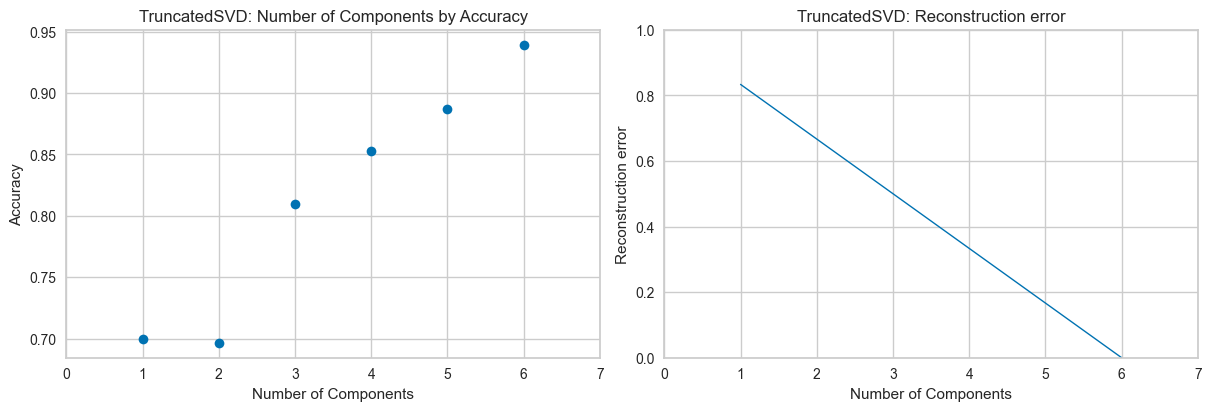

In [32]:
fig, axs = plt.subplots(1 , 2,figsize=(12, 4), constrained_layout=True,)
axs[0].plot(range(1,7),truncatedSVD_accs,'o')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Number of Components')
axs[0].set_xlim(0,7)
axs[0].set_title ('TruncatedSVD: Number of Components by Accuracy')

axs[1].plot(range(1,7),truncatedSVD_losses, linewidth= 1)
axs[1].set_ylabel('Reconstruction error')
axs[1].set_xlabel('Number of Components')
axs[1].set_xlim(0,7)
axs[1].set_ylim(0,1)
axs[1].set_title('TruncatedSVD: Reconstruction error')

# Experiment

Text(0.5, 1.0, 'ICA: Reconstruction error')

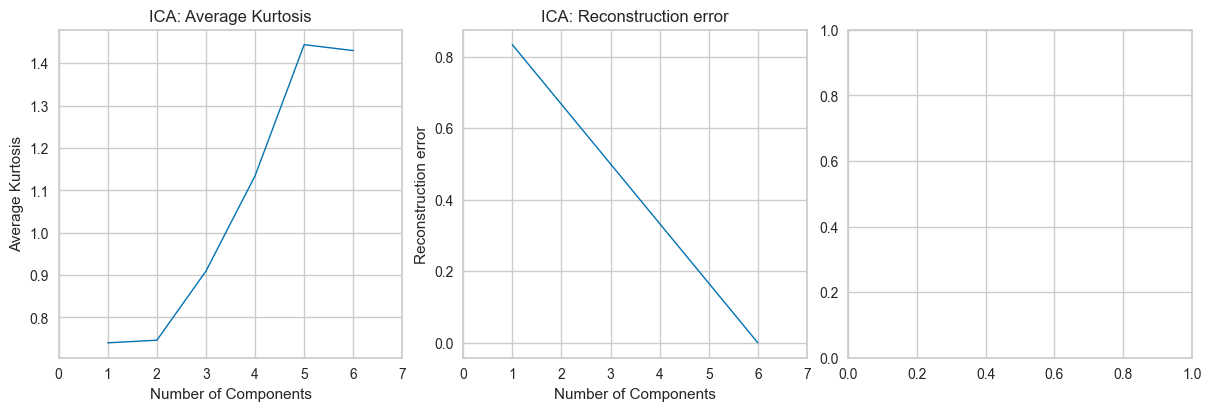

In [33]:
axs[0].plot(ica_comps,ica_accs,'o')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Number of Components')
axs[0].set_xlim(0,7)
axs[0].set_title('ICA: Number of Components by Accuracy')

fig, axs = plt.subplots(1 , 3,figsize=(12, 4), constrained_layout=True,)

axs[0].plot(ica_comps, ica_kurtosis, linewidth= 1)
axs[0].set_ylabel('Average Kurtosis')
axs[0].set_xlabel('Number of Components')
axs[0].set_xlim(0,7)
axs[0].set_title('ICA: Average Kurtosis')

axs[1].plot(ica_comps, ica_reconstruction_error, linewidth= 1)
axs[1].set_ylabel('Reconstruction error')
axs[1].set_xlabel('Number of Components')
axs[1].set_xlim(0,7)
axs[1].set_title('ICA: Reconstruction error')


=======[PCA]========
[PCA]  k-Means -------------
[PCA]  k-Means : #component = 2 ---
[PCA@2] Average Log likelihood for k-Means: 	 -1027.4204730233487
[PCA@2] Adj. Rand Idx for k-Means: 		 0.11800855109514671
[PCA@2] Rand Index for k-Means: 		 0.540257270153767
[PCA]  k-Means : #component = 3 ---
[PCA@3] Average Log likelihood for k-Means: 	 -2527.144845071416
[PCA@3] Adj. Rand Idx for k-Means: 		 0.05189672451211922
[PCA@3] Rand Index for k-Means: 		 0.5057910581397842
[PCA]  k-Means : #component = 4 ---
[PCA@4] Average Log likelihood for k-Means: 	 -4162.970732095764
[PCA@4] Adj. Rand Idx for k-Means: 		 0.03227642680347968
[PCA@4] Rand Index for k-Means: 		 0.4955633833022368
[PCA]  k-Means : #component = 5 ---
[PCA@5] Average Log likelihood for k-Means: 	 -5816.842838604301
[PCA@5] Adj. Rand Idx for k-Means: 		 0.09979759071220719
[PCA@5] Rand Index for k-Means: 		 0.5307688080379164
[PCA]  k-Means : #component = 6 ---
[PCA@6] Average Log likelihood for k-Means: 	 -7541.3333333333

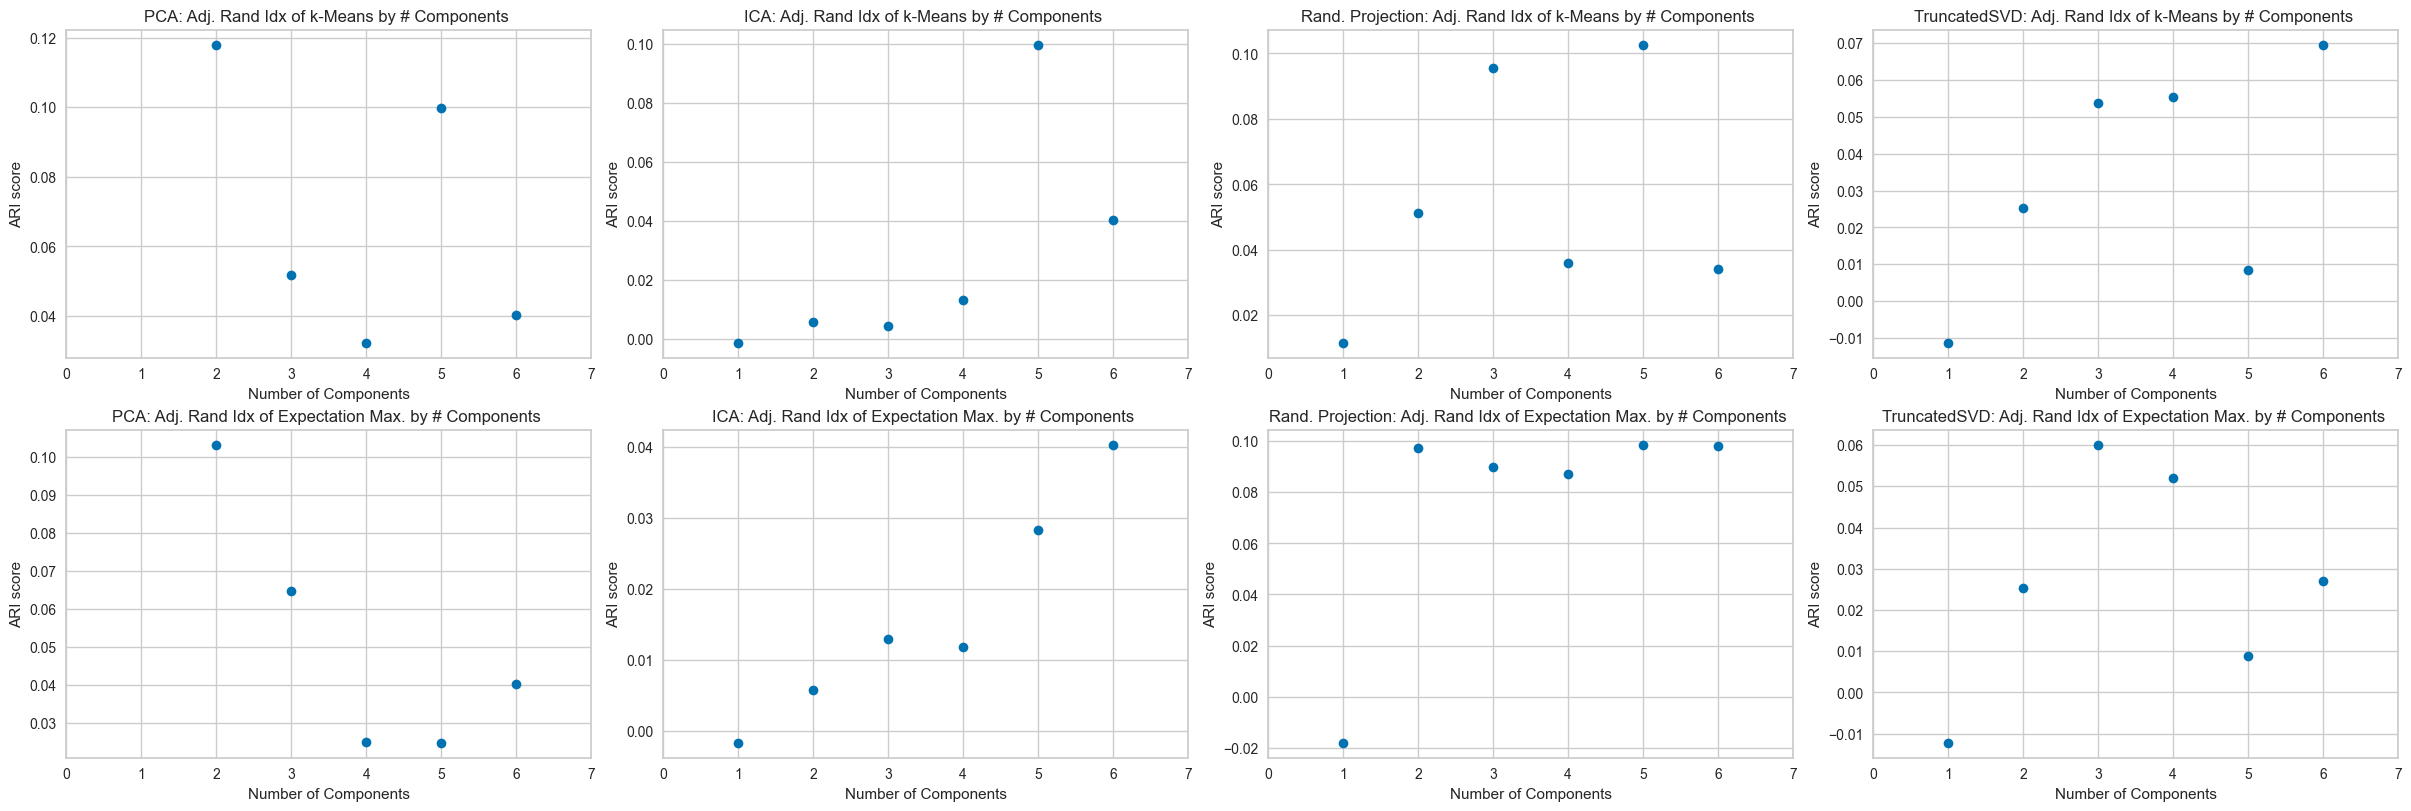

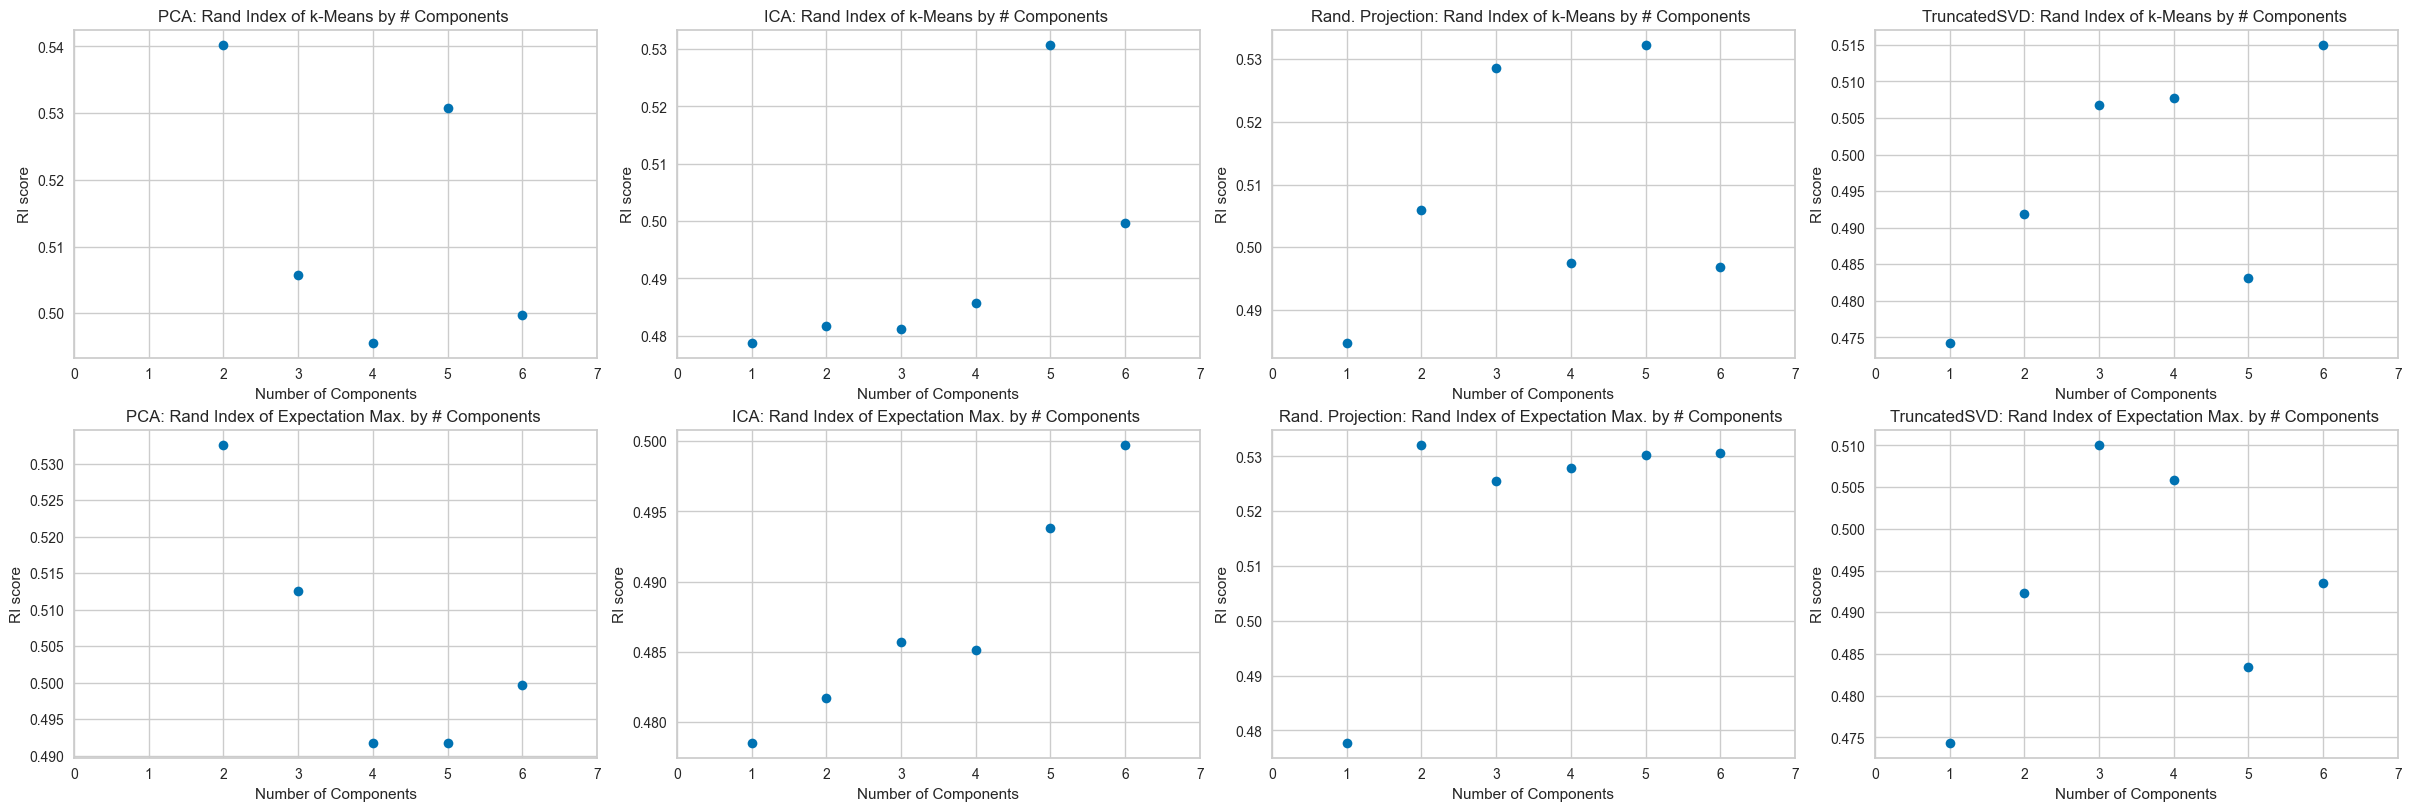

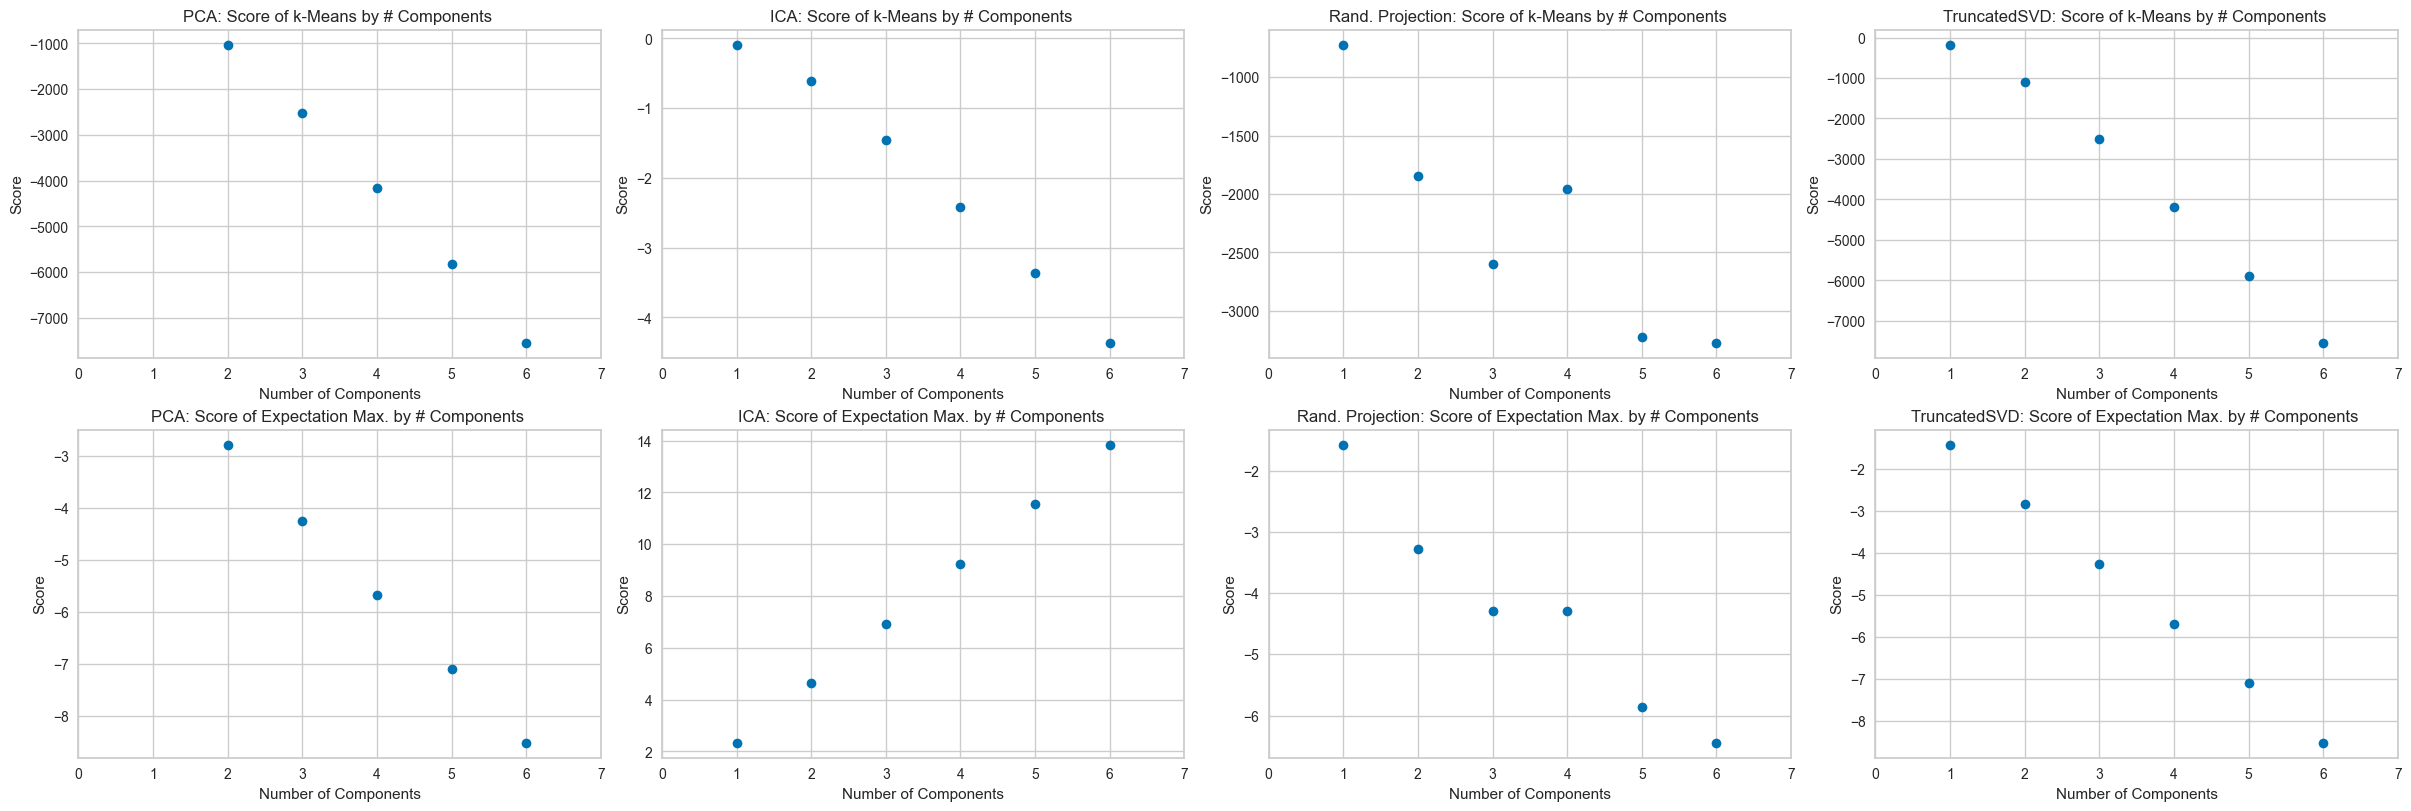

In [40]:
%%time
import pickle
from sklearn.decomposition import PCA

num_class = 4
num_feat = 6
xlim = 7
no_iter = 1000
cl = ['k-Means', 'Expectation Max.']
dr = ['PCA', 'ICA', 'Rand. Projection', 'TruncatedSVD']

fig, axs = plt.subplots(2 , 4,figsize=(24, 8), constrained_layout=True,)
fig1, axs1 = plt.subplots(2 , 4,figsize=(24, 8), constrained_layout=True,)
fig2, axs2 = plt.subplots(2 , 4,figsize=(24, 8), constrained_layout=True,)
ari_score = {}
ri_score = {}
X_transformed = {}
comps = {}
clfs = {}
scores = {}
for i, d in enumerate(dr):
    print(f"=======[{d}]========")
    ari_score[d] = {}
    ri_score[d] = {}
    comps[d] = range(1,num_feat+1) if d != 'PCA' else range(2,num_feat+1)
    X_transformed[d] = {}
    scores[d] = {}
    clfs[d] = {}
    for comp in comps[d]:
        if i == 0:
            transformer = PCA(n_components=comp, random_state=42)
        elif i == 1:
            transformer = FastICA(n_components=comp, random_state=42)
        elif i ==2 :
            transformer = SparseRandomProjection(n_components=comp, random_state=42)
        else:
            transformer = TruncatedSVD(n_components=comp, random_state=42)
        
        X_transformed[d][comp] = transformer.fit_transform(x)

    for j, c in enumerate(cl):
        print(f"[{d}]  {c} -------------")
        ari_score[d][c] = []
        ri_score[d][c] = []
        scores[d][c] = []
        for comp in comps[d]:
            print(f"[{d}]  {c} : #component = {comp} ---")
            if j == 0:
                clf = KMeans(n_clusters=num_class, random_state=42)
            else:
                clf = GaussianMixture(n_components=num_class,covariance_type='spherical', max_iter=no_iter, init_params= 'kmeans', random_state=42)
            clf.fit(X_transformed[d][comp])
            y_pred = clf.predict(X_transformed[d][comp])
            avg_log = clf.score(X_transformed[d][comp])
            scores[d][c].append(avg_log)
            ari = metrics.adjusted_rand_score(y, y_pred)
            ari_score[d][c].append(ari)
            ri = metrics.rand_score(y, y_pred)
            ri_score[d][c].append(ri)
            print(f"[{d}@{comp}] Average Log likelihood for {c}: \t", avg_log)
            print(f"[{d}@{comp}] Adj. Rand Idx for {c}: \t\t", ari)
            print(f"[{d}@{comp}] Rand Index for {c}: \t\t", ri)

        axs[j][i].plot(comps[d],ari_score[d][c],'o')
        axs[j][i].set_ylabel('ARI score')
        axs[j][i].set_xlabel('Number of Components')
        axs[j][i].set_xlim(0,xlim)
        axs[j][i].set_title(f'{d}: Adj. Rand Idx of {c} by # Components ')

        axs1[j][i].plot(comps[d],ri_score[d][c],'o')
        axs1[j][i].set_ylabel('RI score')
        axs1[j][i].set_xlabel('Number of Components')
        axs1[j][i].set_xlim(0,xlim)
        axs1[j][i].set_title(f'{d}: Rand Index of {c} by # Components ')

        axs2[j][i].plot(comps[d],scores[d][c],'o')
        axs2[j][i].set_ylabel('Score')
        axs2[j][i].set_xlabel('Number of Components')
        axs2[j][i].set_xlim(0,xlim)
        axs2[j][i].set_title(f'{d}: Score of {c} by # Components ')
        
        

Text(0.5, 1.0, 'Average score per sample: k-Means')

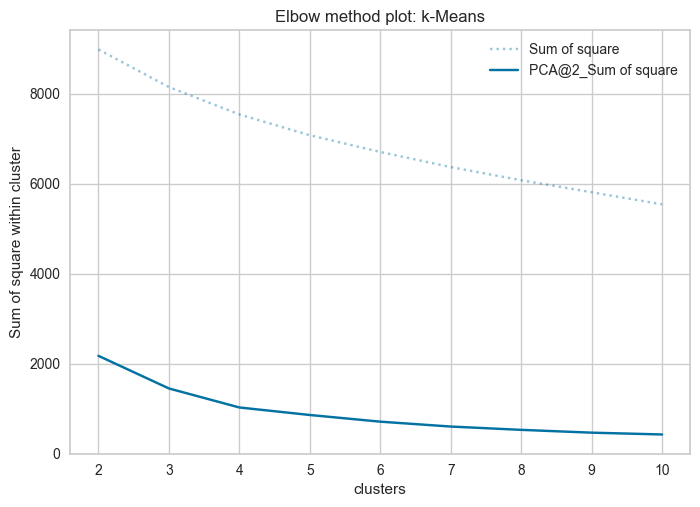

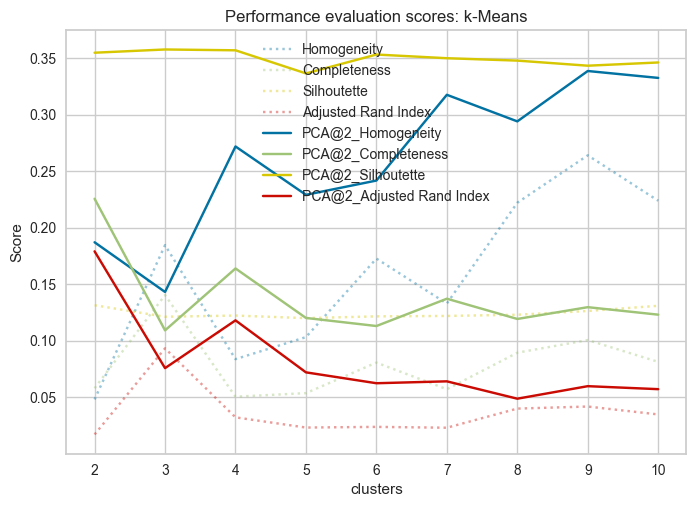

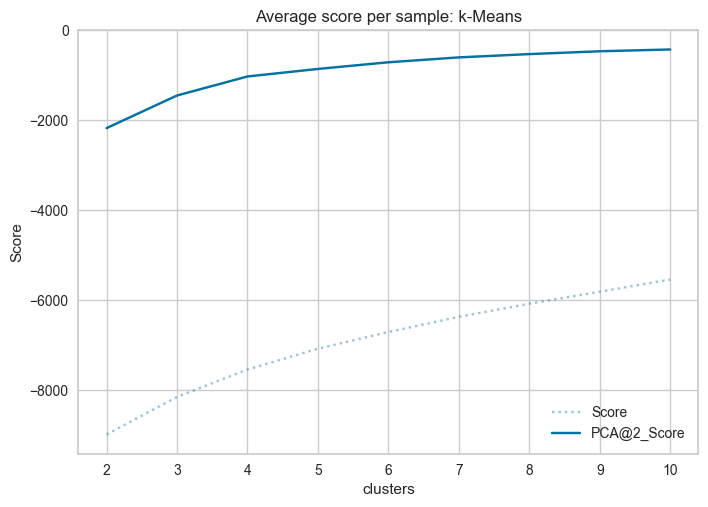

In [72]:
wcss, homo_list, avg_log_list, comp_list, sil_list, ari_list, var_list = [],[],[],[],[], [], []
wcss1, homo_list1, avg_log_list1, comp_list1, sil_list1, ari_list1, var_list1, component_list = [],[],[],[],[],[], [], []
component_list = range(2,11)

for i in component_list:
    clf = KMeans(n_clusters= i, init='k-means++')
    clf.fit(x)
    wcss.append(clf.inertia_)
    y_test_pred = clf.predict(x)
    # Per sample average log likelihood
    avg_log = clf.score(x)
    avg_log_list.append(avg_log)

    # Homogenity score on the test data
    homo = metrics.homogeneity_score(y, y_test_pred)
    homo_list.append(homo)

    # Completeness score
    comp = metrics.completeness_score(y, y_test_pred)
    comp_list.append(comp)

    # Silhoutette score
    sil = metrics.silhouette_score(x, y_test_pred, metric='euclidean')
    sil_list.append(sil)

    # Adjusted Random Index score
    ari = metrics.adjusted_rand_score(y, y_test_pred)
    ari_list.append(ari)

    # Variance explained by the cluster
    var = clf.score(x)
    var_list.append(var)
    # -------------------------------------
    clf.fit(X_transformed['PCA'][2])
    wcss1.append(clf.inertia_)
    y_test_pred = clf.predict(X_transformed['PCA'][2])
    # Per sample average log likelihood
    avg_log = clf.score(X_transformed['PCA'][2])
    avg_log_list1.append(avg_log)

    # Homogenity score on the test data
    homo = metrics.homogeneity_score(y, y_test_pred)
    homo_list1.append(homo)

    # Completeness score
    comp = metrics.completeness_score(y, y_test_pred)
    comp_list1.append(comp)

    # Silhoutette score
    sil = metrics.silhouette_score(X_transformed['PCA'][2], y_test_pred, metric='euclidean')
    sil_list1.append(sil)

    # Adjusted Random IndeX_transformed['PCA'][2] score
    ari = metrics.adjusted_rand_score(y, y_test_pred)
    ari_list1.append(ari)

    # Variance eX_transformed['PCA'][2]plained by the cluster
    var = clf.score(X_transformed['PCA'][2])
    var_list1.append(var)

# Generating plots
fig1, ax1 = plt.subplots()
ax1.plot(component_list, wcss, 'b:', alpha=0.4)
ax1.plot(component_list, wcss1, 'b-')
plt.legend(['Sum of square', 'PCA@2_Sum of square'])
plt.title('Elbow method plot: k-Means')
plt.ylabel('Sum of square within cluster')
plt.xlabel('clusters')

fig4,ax4 = plt.subplots()
ax4.plot(component_list, homo_list, 'b:', alpha=0.4)
ax4.plot(component_list, comp_list, 'g:', alpha=0.4)
ax4.plot(component_list, sil_list, 'y:', alpha=0.4)
ax4.plot(component_list, ari_list, 'r:', alpha=0.4)
ax4.plot(component_list, homo_list1, 'b-')
ax4.plot(component_list, comp_list1, 'g-')
ax4.plot(component_list, sil_list1, 'y-')
ax4.plot(component_list, ari_list1, 'r-')
plt.legend(['Homogeneity','Completeness','Silhoutette', 'Adjusted Rand Index',
'PCA@2_Homogeneity','PCA@2_Completeness','PCA@2_Silhoutette', 'PCA@2_Adjusted Rand Index'])
plt.ylabel('Score')
plt.xlabel('clusters')
plt.title('Performance evaluation scores: k-Means')

fig6, ax6 = plt.subplots()
ax6.plot(component_list, avg_log_list, 'b:', alpha=0.4)
ax6.plot(component_list, avg_log_list1, 'b-')
plt.legend(['Score', 'PCA@2_Score'])
plt.xlabel('clusters')
plt.ylabel('Score')
plt.title('Average score per sample: k-Means')


In [ ]:
wcss, homo_list, avg_log_list, comp_list, sil_list, ari_list, var_list = [],[],[],[],[], [], []
wcss1, homo_list1, avg_log_list1, comp_list1, sil_list1, ari_list1, var_list1, component_list = [],[],[],[],[],[], [], []
component_list = range(2,11)

for i in component_list:
    clf = KMeans(n_clusters= i, init='k-means++')
    clf.fit(x)
    wcss.append(clf.inertia_)
    y_test_pred = clf.predict(x)
    # Per sample average log likelihood
    avg_log = clf.score(x)
    avg_log_list.append(avg_log)

    # Homogenity score on the test data
    homo = metrics.homogeneity_score(y, y_test_pred)
    homo_list.append(homo)

    # Completeness score
    comp = metrics.completeness_score(y, y_test_pred)
    comp_list.append(comp)

    # Silhoutette score
    sil = metrics.silhouette_score(x, y_test_pred, metric='euclidean')
    sil_list.append(sil)

    # Adjusted Random Index score
    ari = metrics.adjusted_rand_score(y, y_test_pred)
    ari_list.append(ari)

    # Variance explained by the cluster
    var = clf.score(x)
    var_list.append(var)
    # -------------------------------------
    clf.fit(X_transformed['PCA'][2])
    wcss1.append(clf.inertia_)
    y_test_pred = clf.predict(X_transformed['PCA'][2])
    # Per sample average log likelihood
    avg_log = clf.score(X_transformed['PCA'][2])
    avg_log_list1.append(avg_log)

    # Homogenity score on the test data
    homo = metrics.homogeneity_score(y, y_test_pred)
    homo_list1.append(homo)

    # Completeness score
    comp = metrics.completeness_score(y, y_test_pred)
    comp_list1.append(comp)

    # Silhoutette score
    sil = metrics.silhouette_score(X_transformed['PCA'][2], y_test_pred, metric='euclidean')
    sil_list1.append(sil)

    # Adjusted Random IndeX_transformed['PCA'][2] score
    ari = metrics.adjusted_rand_score(y, y_test_pred)
    ari_list1.append(ari)

    # Variance eX_transformed['PCA'][2]plained by the cluster
    var = clf.score(X_transformed['PCA'][2])
    var_list1.append(var)

# Generating plots
fig1, ax1 = plt.subplots()
ax1.plot(component_list, wcss, 'b:', alpha=0.4)
ax1.plot(component_list, wcss1, 'b-')
plt.legend(['Sum of square', 'PCA@2_Sum of square'])
plt.title('Elbow method plot: k-Means')
plt.ylabel('Sum of square within cluster')
plt.xlabel('clusters')

fig4,ax4 = plt.subplots()
ax4.plot(component_list, homo_list, 'b:', alpha=0.4)
ax4.plot(component_list, comp_list, 'g:', alpha=0.4)
ax4.plot(component_list, sil_list, 'y:', alpha=0.4)
ax4.plot(component_list, ari_list, 'r:', alpha=0.4)
ax4.plot(component_list, homo_list1, 'b-')
ax4.plot(component_list, comp_list1, 'g-')
ax4.plot(component_list, sil_list1, 'y-')
ax4.plot(component_list, ari_list1, 'r-')
plt.legend(['Homogeneity','Completeness','Silhoutette', 'Adjusted Rand Index',
'PCA@2_Homogeneity','PCA@2_Completeness','PCA@2_Silhoutette', 'PCA@2_Adjusted Rand Index'])
plt.ylabel('Score')
plt.xlabel('clusters')
plt.title('Performance evaluation scores: k-Means')

fig6, ax6 = plt.subplots()
ax6.plot(component_list, avg_log_list, 'b:', alpha=0.4)
ax6.plot(component_list, avg_log_list1, 'b-')
plt.legend(['Score', 'PCA@2_Score'])
plt.xlabel('clusters')
plt.ylabel('Score')
plt.title('Average score per sample: k-Means')


Text(0.5, 1.0, 'Average score per sample: Expectation Maximization')

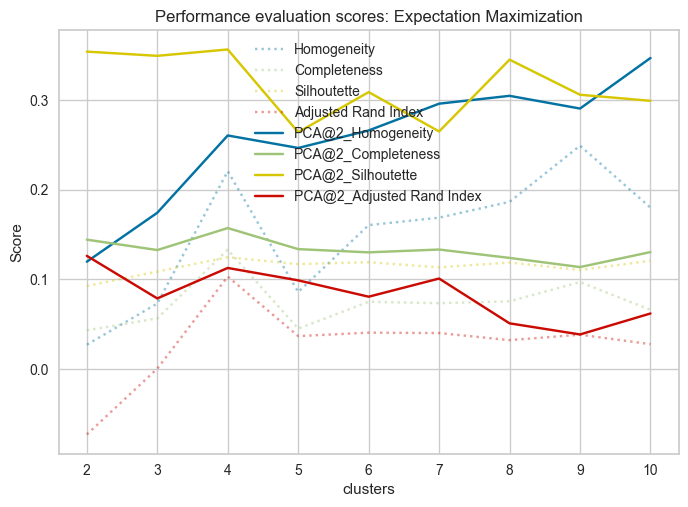

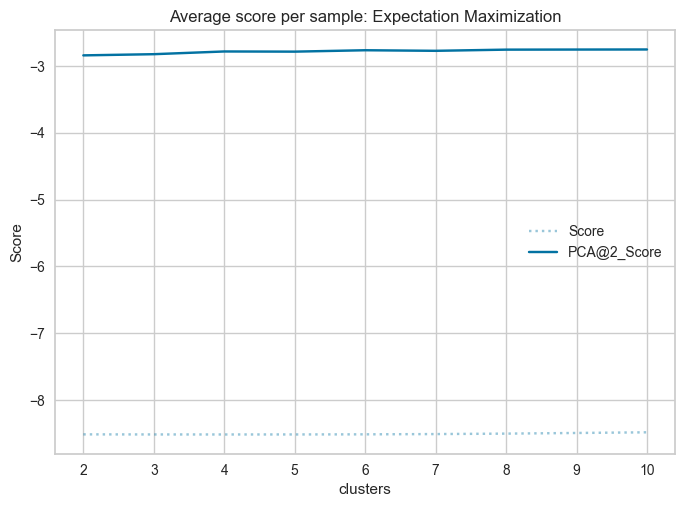

In [75]:
wcss, homo_list, avg_log_list, comp_list, sil_list, ari_list, var_list = [],[],[],[],[], [], []
wcss1, homo_list1, avg_log_list1, comp_list1, sil_list1, ari_list1, var_list1, component_list = [],[],[],[],[],[], [], []
no_iter = 1000
component_list = range(2,11)

for i in component_list:
    clf = GaussianMixture(n_components=i,covariance_type='spherical', max_iter=no_iter, init_params= 'kmeans')
    clf.fit(x)
    y_test_pred = clf.predict(x)
    # Per sample average log likelihood
    avg_log = clf.score(x)
    avg_log_list.append(avg_log)

    # Homogenity score on the test data
    homo = metrics.homogeneity_score(y, y_test_pred)
    homo_list.append(homo)

    # Completeness score
    comp = metrics.completeness_score(y, y_test_pred)
    comp_list.append(comp)

    # Silhoutette score
    sil = metrics.silhouette_score(x, y_test_pred, metric='euclidean')
    sil_list.append(sil)

    # Adjusted Random Index score
    ari = metrics.adjusted_rand_score(y, y_test_pred)
    ari_list.append(ari)

    # Variance explained by the cluster
    var = clf.score(x)
    var_list.append(var)
    # -------------------------------------
    clf.fit(X_transformed['PCA'][2])
    y_test_pred = clf.predict(X_transformed['PCA'][2])
    # Per sample average log likelihood
    avg_log = clf.score(X_transformed['PCA'][2])
    avg_log_list1.append(avg_log)

    # Homogenity score on the test data
    homo = metrics.homogeneity_score(y, y_test_pred)
    homo_list1.append(homo)

    # Completeness score
    comp = metrics.completeness_score(y, y_test_pred)
    comp_list1.append(comp)

    # Silhoutette score
    sil = metrics.silhouette_score(X_transformed['PCA'][2], y_test_pred, metric='euclidean')
    sil_list1.append(sil)

    # Adjusted Random IndeX_transformed['PCA'][2] score
    ari = metrics.adjusted_rand_score(y, y_test_pred)
    ari_list1.append(ari)

    # Variance eX_transformed['PCA'][2]plained by the cluster
    var = clf.score(X_transformed['PCA'][2])
    var_list1.append(var)

fig4,ax4 = plt.subplots()
ax4.plot(component_list, homo_list, 'b:', alpha=0.4)
ax4.plot(component_list, comp_list, 'g:', alpha=0.4)
ax4.plot(component_list, sil_list, 'y:', alpha=0.4)
ax4.plot(component_list, ari_list, 'r:', alpha=0.4)
ax4.plot(component_list, homo_list1, 'b-')
ax4.plot(component_list, comp_list1, 'g-')
ax4.plot(component_list, sil_list1, 'y-')
ax4.plot(component_list, ari_list1, 'r-')
plt.legend(['Homogeneity','Completeness','Silhoutette', 'Adjusted Rand Index',
'PCA@2_Homogeneity','PCA@2_Completeness','PCA@2_Silhoutette', 'PCA@2_Adjusted Rand Index'])
plt.ylabel('Score')
plt.xlabel('clusters')
plt.title('Performance evaluation scores: Expectation Maximization')

fig6, ax6 = plt.subplots()
ax6.plot(component_list, avg_log_list, 'b:', alpha=0.4)
ax6.plot(component_list, avg_log_list1, 'b-')
plt.legend(['Score', 'PCA@2_Score'])
plt.xlabel('clusters')
plt.ylabel('Score')
plt.title('Average score per sample: Expectation Maximization')


Fitting 10 folds for each of 26 candidates, totalling 260 fits
Best Parameters:
 {'hidden_layer_sizes': (12, 12, 12)}
Best Estimators:
 MLPClassifier(early_stopping=True, hidden_layer_sizes=(12, 12, 12),
              max_iter=1000, n_iter_no_change=100, random_state=1,
              validation_fraction=0.2)
F1 Score:  0.7727640298130377
Training Accuracy:  0.8006617038875103
Testing Accuracy:  0.8015414258188824
Confusion Matrix
[[338  25   0   0]
 [ 37  78   0   0]
 [  2  19   0   0]
 [  2  18   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       363
           1       0.56      0.68      0.61       115
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        20

    accuracy                           0.80       519
   macro avg       0.36      0.40      0.38       519
weighted avg       0.75      0.80      0.77       519

Cross Validation Score
[0.878866

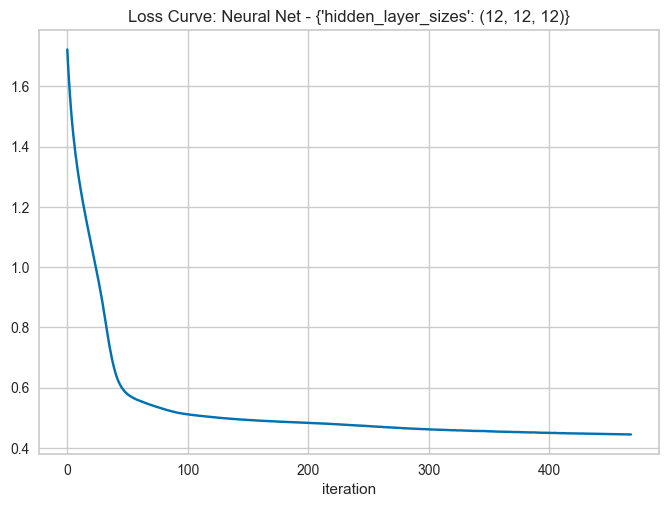

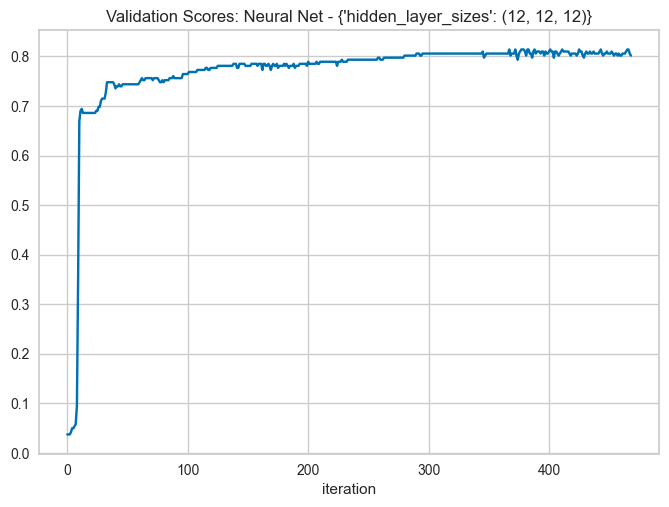

Fitting 10 folds for each of 26 candidates, totalling 260 fits
Best Parameters:
 {'hidden_layer_sizes': (13, 13, 13)}
Best Estimators:
 MLPClassifier(early_stopping=True, hidden_layer_sizes=(13, 13, 13),
              max_iter=1000, n_iter_no_change=100, random_state=1,
              validation_fraction=0.2)
F1 Score:  0.7396010982646085
Training Accuracy:  0.7791563275434243
Testing Accuracy:  0.7726396917148363
Confusion Matrix
[[338  25   0   0]
 [ 52  63   0   0]
 [  7  14   0   0]
 [  1  19   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       363
           1       0.52      0.55      0.53       115
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        20

    accuracy                           0.77       519
   macro avg       0.34      0.37      0.36       519
weighted avg       0.71      0.77      0.74       519

Cross Validation Score
[0.924047

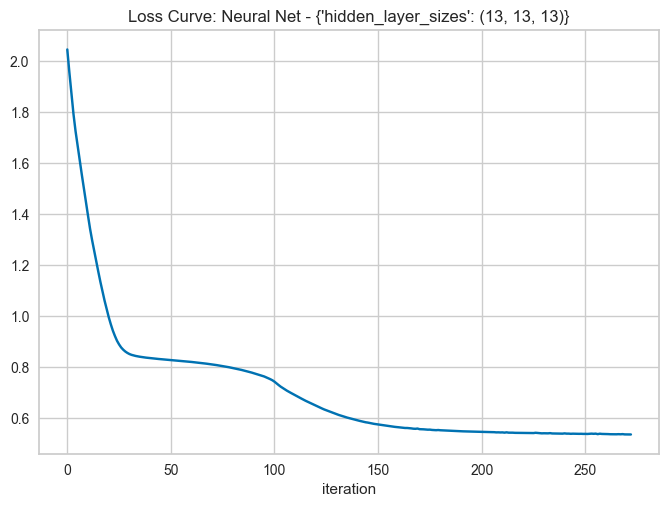

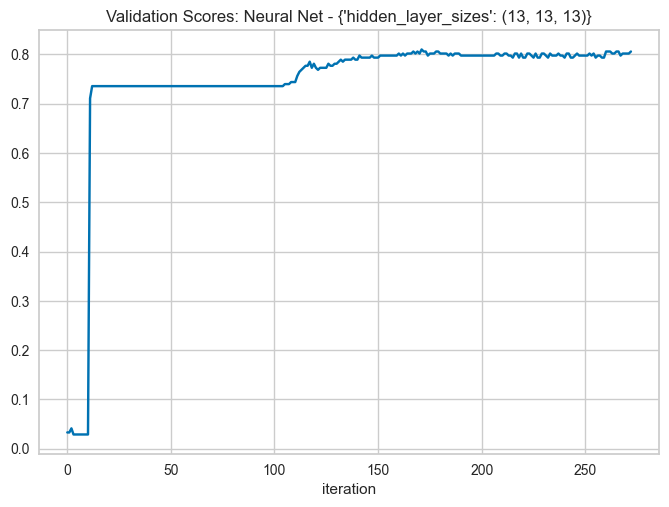

Fitting 10 folds for each of 26 candidates, totalling 260 fits
Best Parameters:
 {'hidden_layer_sizes': (14, 14, 14)}
Best Estimators:
 MLPClassifier(early_stopping=True, hidden_layer_sizes=(14, 14, 14),
              max_iter=1000, n_iter_no_change=100, random_state=1,
              validation_fraction=0.2)
F1 Score:  0.8657329732647064
Training Accuracy:  0.8982630272952854
Testing Accuracy:  0.8709055876685935
Confusion Matrix
[[347  16   0   0]
 [ 29  81   0   5]
 [  3   5   8   5]
 [  0   4   0  16]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       363
           1       0.76      0.70      0.73       115
           2       1.00      0.38      0.55        21
           3       0.62      0.80      0.70        20

    accuracy                           0.87       519
   macro avg       0.82      0.71      0.73       519
weighted avg       0.87      0.87      0.87       519

Cross Validation Score
[0.867971

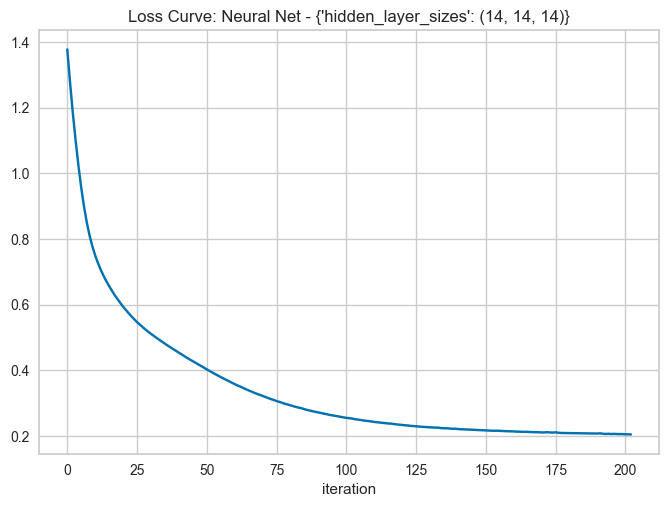

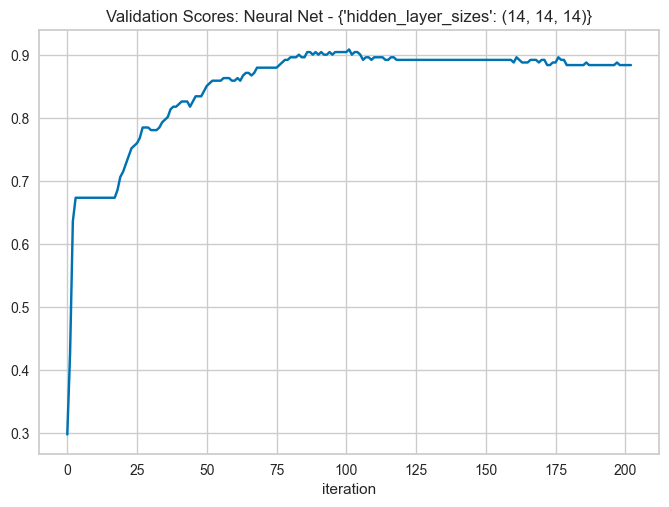

Fitting 10 folds for each of 26 candidates, totalling 260 fits
Best Parameters:
 {'hidden_layer_sizes': (10, 10)}
Best Estimators:
 MLPClassifier(early_stopping=True, hidden_layer_sizes=(10, 10), max_iter=1000,
              n_iter_no_change=100, random_state=1, validation_fraction=0.2)
F1 Score:  0.7871563501706663
Training Accuracy:  0.8271298593879239
Testing Accuracy:  0.7957610789980732
Confusion Matrix
[[332  24   7   0]
 [ 46  67   2   0]
 [  7   2   9   3]
 [  0  11   4   5]]
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       363
           1       0.64      0.58      0.61       115
           2       0.41      0.43      0.42        21
           3       0.62      0.25      0.36        20

    accuracy                           0.80       519
   macro avg       0.64      0.54      0.57       519
weighted avg       0.79      0.80      0.79       519

Cross Validation Score
[0.80444411 0.93561998 0.923812

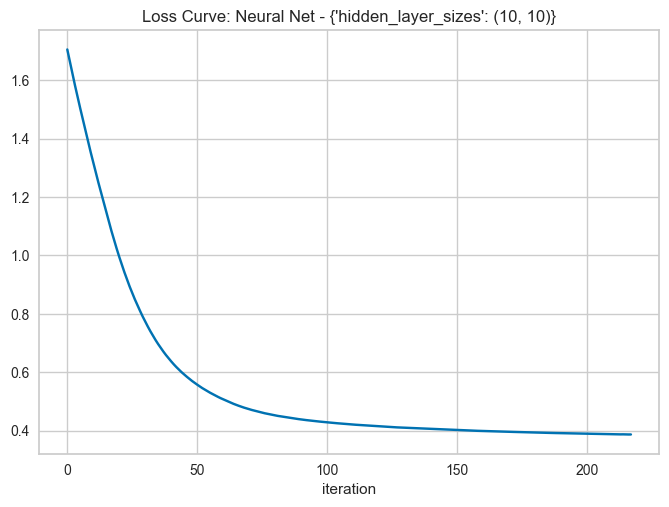

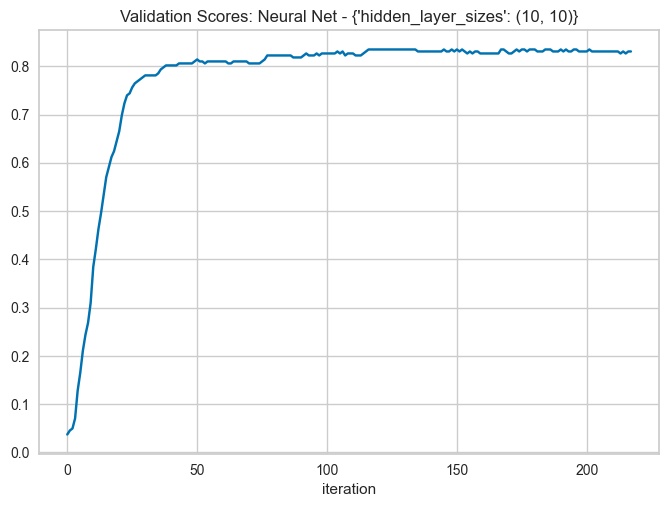

CPU times: user 4min 9s, sys: 985 ms, total: 4min 10s
Wall time: 4min 8s


In [57]:
%%time
from sklearn.model_selection import GridSearchCV

num_class = 4
dr = ['PCA', 'ICA', 'Rand. Projection', 'TruncatedSVD']
dataset = [X_transformed['PCA'][2],
            X_transformed['ICA'][5],
            X_transformed['Rand. Projection'][5],
            X_transformed['TruncatedSVD'][3]
            ]
for i, x_t in enumerate(dataset):
    print(f"==================={dr[i]}=====================")
    x_train, x_test, y_train, y_test = train_test_split(x_t, y, test_size=0.3,random_state=42, stratify=y)
    # Parameter Grid
    param_grid = {'hidden_layer_sizes': [(n,n) for n in range(2,15)] + [(n,n,n) for n in range(2,15)]}

    # Make grid search classifier
    clf_grid = GridSearchCV(MLPClassifier(max_iter=1000, early_stopping=True,activation = 'relu',
                        solver='adam',random_state=1, validation_fraction=0.2, n_iter_no_change=100), param_grid, verbose=1, cv=10)

    # Train the classifier
    clf_grid.fit(x_train, y_train)

    y_pred = clf_grid.predict(x_test)
    print("Best Parameters:\n", clf_grid.best_params_)
    print("Best Estimators:\n", clf_grid.best_estimator_)
    y_pred = clf_grid.best_estimator_.predict(x_test)

    print("F1 Score: ", f1_score(y_test,y_pred, average='weighted'))
    print("Training Accuracy: ", clf_grid.best_estimator_.score(x_train, y_train))
    print("Testing Accuracy: ", clf_grid.best_estimator_.score(x_test, y_test))
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report")
    print(classification_report(y_test,y_pred))
    print("Cross Validation Score")
    print(cross_val_score(clf_grid.best_estimator_, x, y, cv=10, scoring='f1_weighted'))
    print("Best Params : ", clf_grid.best_params_)
    plt.plot(clf_grid.best_estimator_.loss_curve_)
    plt.title(f"Loss Curve: Neural Net - {clf_grid.best_params_}")
    plt.xlabel("Log Loss")
    plt.xlabel("iteration")
    plt.show()

    plt.plot(clf_grid.best_estimator_.validation_scores_)
    plt.title(f"Validation Scores: Neural Net - {clf_grid.best_params_}")
    plt.xlabel("Validation score")
    plt.xlabel("iteration")
    plt.show()


===================PCA=====================
Fitting 10 folds for each of 26 candidates, totalling 260 fits
Best Parameters:
 {'hidden_layer_sizes': (14, 14, 14)}
Best Estimators:
 MLPClassifier(early_stopping=True, hidden_layer_sizes=(14, 14, 14),
              max_iter=1000, n_iter_no_change=100, random_state=1,
              validation_fraction=0.2)
F1 Score:  0.9535558158212535
Training Accuracy:  0.9884201819685691
Testing Accuracy:  0.953757225433526
Confusion Matrix
[[354   9   0   0]
 [  7 107   1   0]
 [  0   6  15   0]
 [  0   1   0  19]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       363
           1       0.87      0.93      0.90       115
           2       0.94      0.71      0.81        21
           3       1.00      0.95      0.97        20

    accuracy                           0.95       519
   macro avg       0.95      0.89      0.92       519
weighted avg       0.96      0.95      0.95 

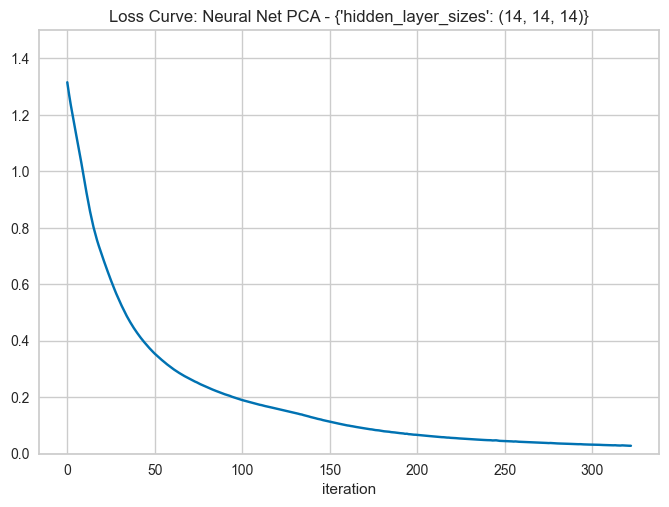

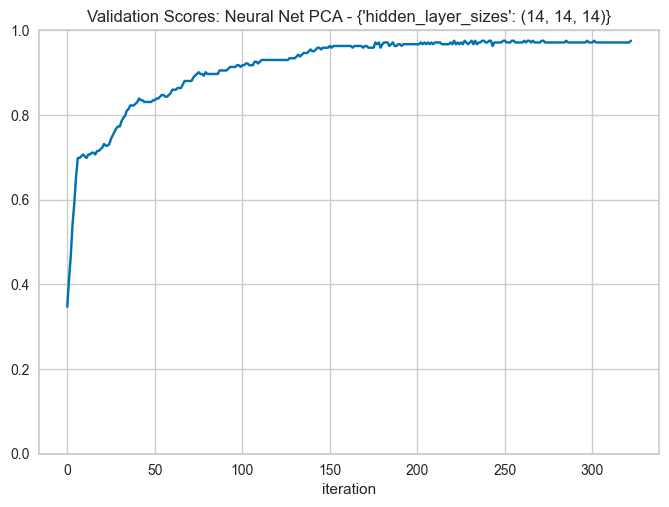

===================ICA=====================
Fitting 10 folds for each of 26 candidates, totalling 260 fits
Best Parameters:
 {'hidden_layer_sizes': (11, 11, 11)}
Best Estimators:
 MLPClassifier(early_stopping=True, hidden_layer_sizes=(11, 11, 11),
              max_iter=1000, n_iter_no_change=100, random_state=1,
              validation_fraction=0.2)
F1 Score:  0.7642993582345868
Training Accuracy:  0.8138957816377171
Testing Accuracy:  0.7784200385356455
Confusion Matrix
[[326  37   0   0]
 [ 47  66   0   2]
 [  0  17   0   4]
 [  0   8   0  12]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       363
           1       0.52      0.57      0.54       115
           2       0.00      0.00      0.00        21
           3       0.67      0.60      0.63        20

    accuracy                           0.78       519
   macro avg       0.51      0.52      0.52       519
weighted avg       0.75      0.78      0.76

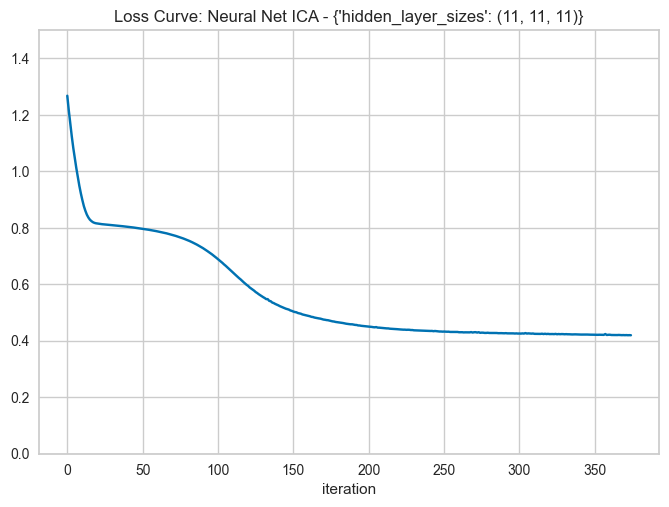

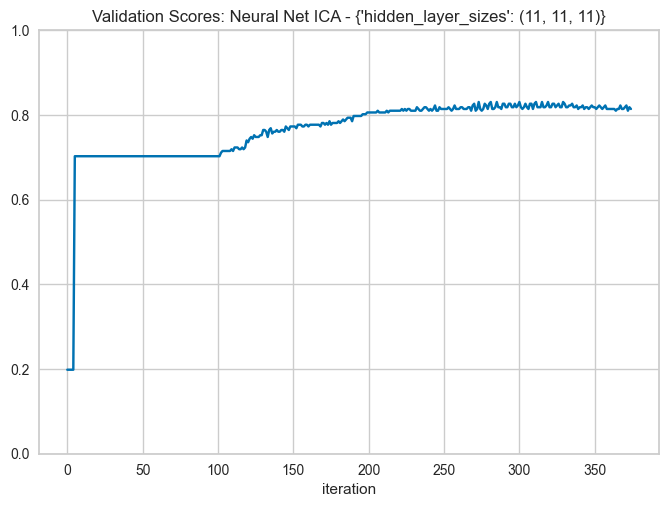

===================Rand. Projection=====================
Fitting 10 folds for each of 26 candidates, totalling 260 fits
Best Parameters:
 {'hidden_layer_sizes': (14, 14, 14)}
Best Estimators:
 MLPClassifier(early_stopping=True, hidden_layer_sizes=(14, 14, 14),
              max_iter=1000, n_iter_no_change=100, random_state=1,
              validation_fraction=0.2)
F1 Score:  0.8676177451467378
Training Accuracy:  0.9090157154673284
Testing Accuracy:  0.8670520231213873
Confusion Matrix
[[335  27   1   0]
 [ 23  89   0   3]
 [  1   5  13   2]
 [  0   6   1  13]]
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       363
           1       0.70      0.77      0.74       115
           2       0.87      0.62      0.72        21
           3       0.72      0.65      0.68        20

    accuracy                           0.87       519
   macro avg       0.81      0.74      0.77       519
weighted avg       0.87      0

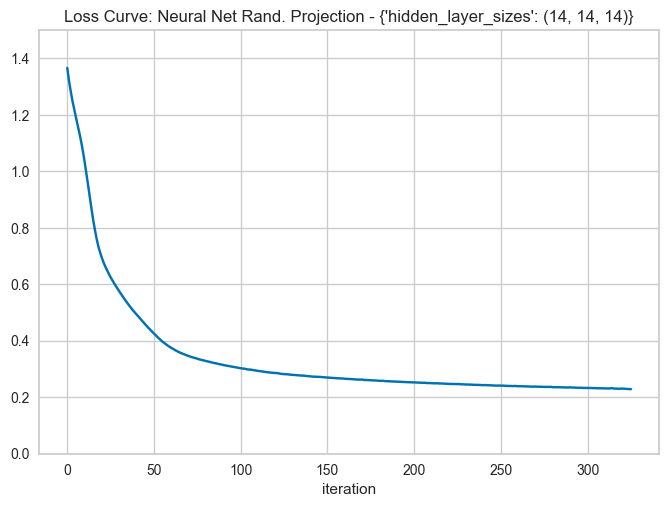

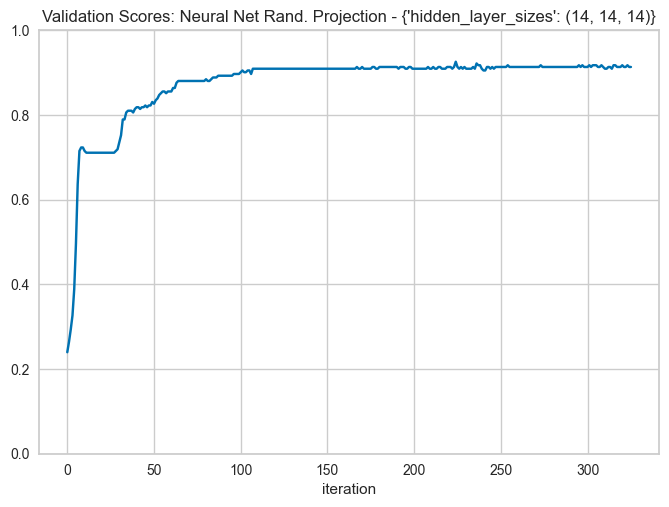

===================TruncatedSVD=====================
Fitting 10 folds for each of 26 candidates, totalling 260 fits
Best Parameters:
 {'hidden_layer_sizes': (12, 12, 12)}
Best Estimators:
 MLPClassifier(early_stopping=True, hidden_layer_sizes=(12, 12, 12),
              max_iter=1000, n_iter_no_change=100, random_state=1,
              validation_fraction=0.2)
F1 Score:  0.9598528236276911
Training Accuracy:  0.989247311827957
Testing Accuracy:  0.9614643545279383
Confusion Matrix
[[358   4   1   0]
 [  4 110   0   1]
 [  0   7  12   2]
 [  0   1   0  19]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       363
           1       0.90      0.96      0.93       115
           2       0.92      0.57      0.71        21
           3       0.86      0.95      0.90        20

    accuracy                           0.96       519
   macro avg       0.92      0.87      0.88       519
weighted avg       0.96      0.96  

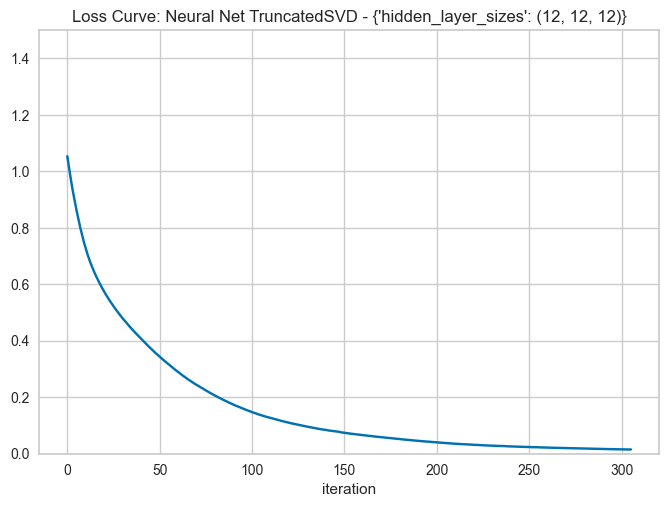

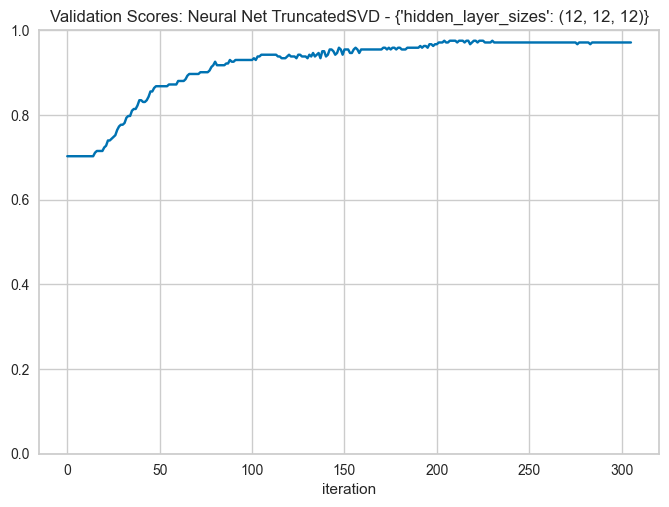

CPU times: user 5min 38s, sys: 1.75 s, total: 5min 40s
Wall time: 5min 41s


In [77]:
%%time
from sklearn.model_selection import GridSearchCV

num_class = 4
dr = ['PCA', 'ICA', 'Rand. Projection', 'TruncatedSVD']
dataset = [X_transformed['PCA'][6],
            X_transformed['ICA'][6],
            X_transformed['Rand. Projection'][6],
            X_transformed['TruncatedSVD'][6]
            ]
for i, x_t in enumerate(dataset):
    print(f"==================={dr[i]}=====================")
    x_train, x_test, y_train, y_test = train_test_split(x_t, y, test_size=0.3,random_state=42, stratify=y)
    # Parameter Grid
    param_grid = {'hidden_layer_sizes': [(n,n) for n in range(2,15)] + [(n,n,n) for n in range(2,15)]}

    # Make grid search classifier
    clf_grid = GridSearchCV(MLPClassifier(max_iter=1000, early_stopping=True,activation = 'relu',
                        solver='adam',random_state=1, validation_fraction=0.2, n_iter_no_change=100), param_grid, verbose=1, cv=10)

    # Train the classifier
    clf_grid.fit(x_train, y_train)

    y_pred = clf_grid.predict(x_test)
    print("Best Parameters:\n", clf_grid.best_params_)
    print("Best Estimators:\n", clf_grid.best_estimator_)
    y_pred = clf_grid.best_estimator_.predict(x_test)

    print("F1 Score: ", f1_score(y_test,y_pred, average='weighted'))
    print("Training Accuracy: ", clf_grid.best_estimator_.score(x_train, y_train))
    print("Testing Accuracy: ", clf_grid.best_estimator_.score(x_test, y_test))
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report")
    print(classification_report(y_test,y_pred))
    print("Cross Validation Score")
    print(cross_val_score(clf_grid.best_estimator_, x, y, cv=10, scoring='f1_weighted'))
    print("Best Params : ", clf_grid.best_params_)
    plt.plot(clf_grid.best_estimator_.loss_curve_)
    plt.title(f"Loss Curve: Neural Net {dr[i]} - {clf_grid.best_params_}")
    plt.xlabel("Log Loss")
    plt.ylim(0,1.5)
    plt.xlabel("iteration")
    plt.show()

    plt.plot(clf_grid.best_estimator_.validation_scores_)
    plt.title(f"Validation Scores: Neural Net {dr[i]} - {clf_grid.best_params_}")
    plt.xlabel("Validation score")
    plt.ylim(0,1)
    plt.xlabel("iteration")
    plt.show()


In [97]:
X_transformed['PCA'][6].shape

(1728, 6)

=================== PCA#2 =====================
------------ k-Means------------
(1728, 2)
(1728,)
(1728, 3)
Fitting 10 folds for each of 26 candidates, totalling 260 fits
Best Parameters:
 {'hidden_layer_sizes': (14, 14)}
Best Estimators:
 MLPClassifier(early_stopping=True, hidden_layer_sizes=(14, 14), max_iter=1000,
              n_iter_no_change=100, random_state=1, validation_fraction=0.2)
F1 Score:  0.7691406584761569
Training Accuracy:  0.8014888337468983
Testing Accuracy:  0.7957610789980732
Confusion Matrix
[[335  28   0   0]
 [ 37  78   0   0]
 [  0  21   0   0]
 [  1  19   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       363
           1       0.53      0.68      0.60       115
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        20

    accuracy                           0.80       519
   macro avg       0.36      0.40      0.38       519


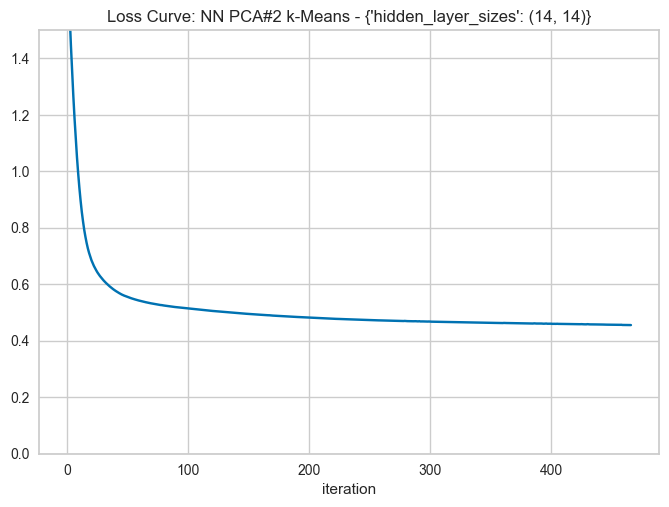

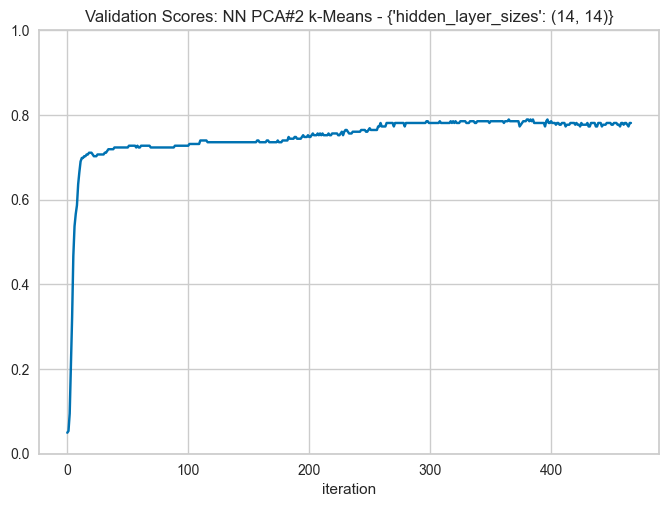

------------ Expectation Max.------------
(1728, 2)
(1728,)
(1728, 3)
Fitting 10 folds for each of 26 candidates, totalling 260 fits
Best Parameters:
 {'hidden_layer_sizes': (6, 6, 6)}
Best Estimators:
 MLPClassifier(early_stopping=True, hidden_layer_sizes=(6, 6, 6), max_iter=1000,
              n_iter_no_change=100, random_state=1, validation_fraction=0.2)
F1 Score:  0.7668407060352899
Training Accuracy:  0.7948717948717948
Testing Accuracy:  0.789980732177264
Confusion Matrix
[[328  35   0   0]
 [ 33  82   0   0]
 [  0  21   0   0]
 [  0  20   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       363
           1       0.52      0.71      0.60       115
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        20

    accuracy                           0.79       519
   macro avg       0.36      0.40      0.38       519
weighted avg       0.75      0.79     

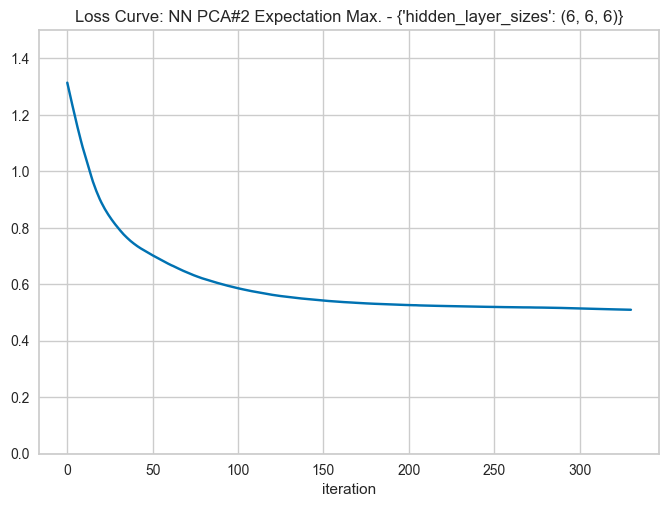

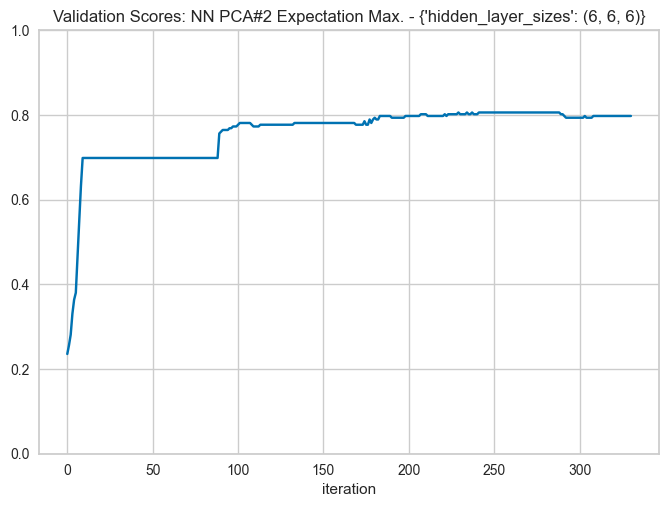

=================== ICA#5 =====================
------------ k-Means------------
(1728, 5)
(1728,)
(1728, 6)
Fitting 10 folds for each of 26 candidates, totalling 260 fits
Best Parameters:
 {'hidden_layer_sizes': (13, 13, 13)}
Best Estimators:
 MLPClassifier(early_stopping=True, hidden_layer_sizes=(13, 13, 13),
              max_iter=1000, n_iter_no_change=100, random_state=1,
              validation_fraction=0.2)
F1 Score:  0.7461641491889895
Training Accuracy:  0.7741935483870968
Testing Accuracy:  0.7784200385356455
Confusion Matrix
[[335  28   0   0]
 [ 46  69   0   0]
 [ 11  10   0   0]
 [  3  17   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       363
           1       0.56      0.60      0.58       115
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        20

    accuracy                           0.78       519
   macro avg       0.35      0.3

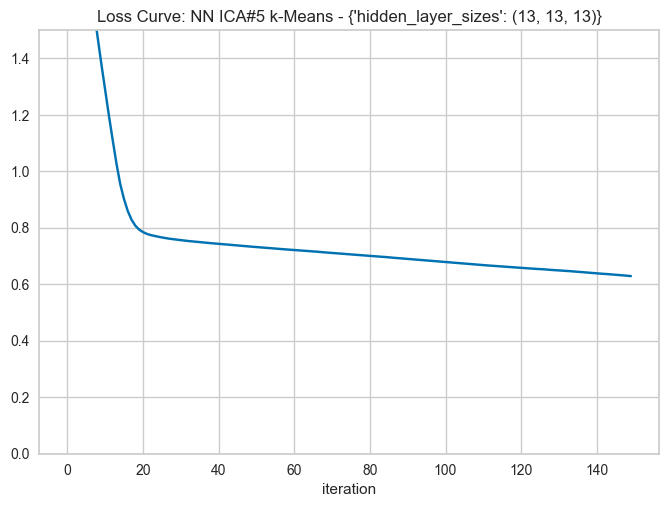

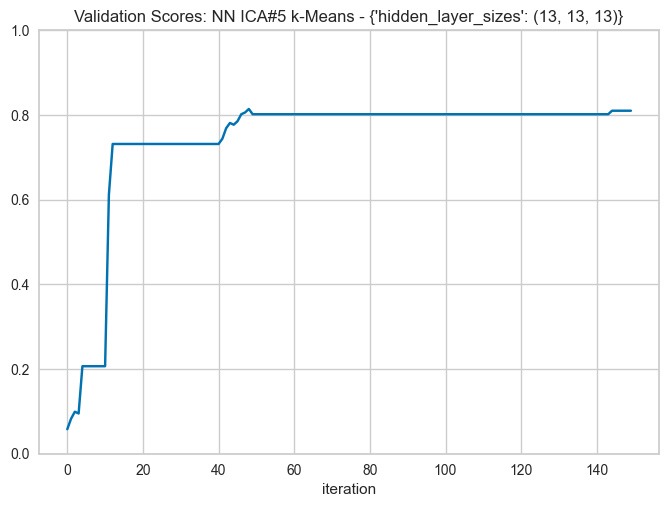

------------ Expectation Max.------------
(1728, 5)
(1728,)
(1728, 6)
Fitting 10 folds for each of 26 candidates, totalling 260 fits
Best Parameters:
 {'hidden_layer_sizes': (10, 10)}
Best Estimators:
 MLPClassifier(early_stopping=True, hidden_layer_sizes=(10, 10), max_iter=1000,
              n_iter_no_change=100, random_state=1, validation_fraction=0.2)
F1 Score:  0.7543440524727876
Training Accuracy:  0.7832919768403639
Testing Accuracy:  0.789980732177264
Confusion Matrix
[[346  17   0   0]
 [ 51  64   0   0]
 [  7  14   0   0]
 [  0  20   0   0]]
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       363
           1       0.56      0.56      0.56       115
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        20

    accuracy                           0.79       519
   macro avg       0.35      0.38      0.36       519
weighted avg       0.72      0.79      0

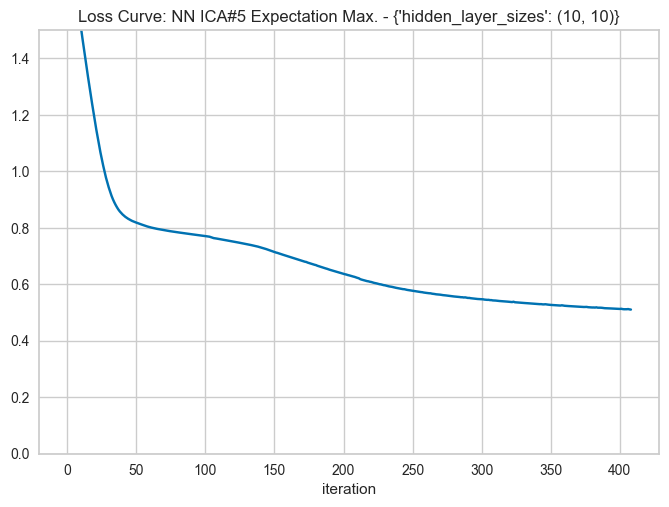

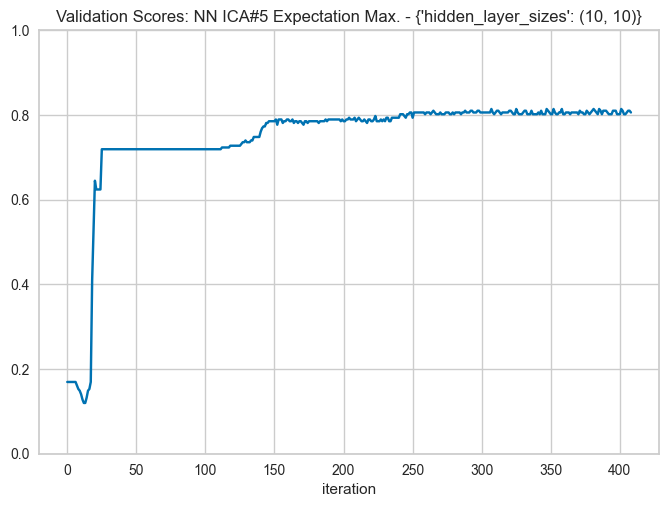

=================== Rand. Projection#5 =====================
------------ k-Means------------
(1728, 5)
(1728,)
(1728, 6)
Fitting 10 folds for each of 26 candidates, totalling 260 fits
Best Parameters:
 {'hidden_layer_sizes': (12, 12, 12)}
Best Estimators:
 MLPClassifier(early_stopping=True, hidden_layer_sizes=(12, 12, 12),
              max_iter=1000, n_iter_no_change=100, random_state=1,
              validation_fraction=0.2)
F1 Score:  0.8828062836046876
Training Accuracy:  0.9048800661703887
Testing Accuracy:  0.884393063583815
Confusion Matrix
[[345  17   1   0]
 [ 25  84   3   3]
 [  1   4  14   2]
 [  0   4   0  16]]
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       363
           1       0.77      0.73      0.75       115
           2       0.78      0.67      0.72        21
           3       0.76      0.80      0.78        20

    accuracy                           0.88       519
   macro avg       0

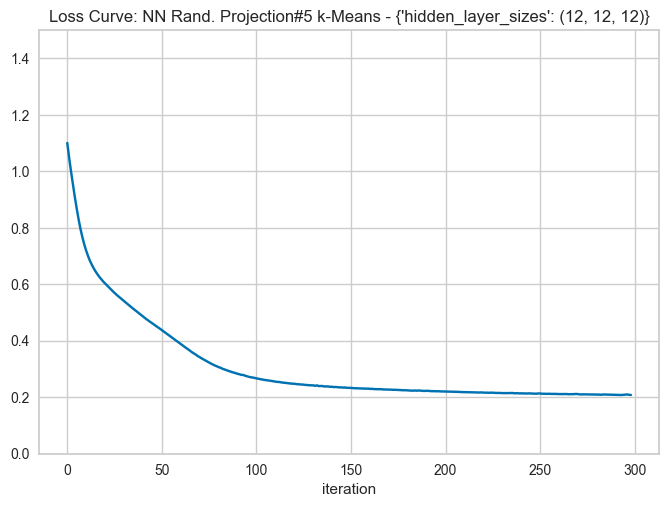

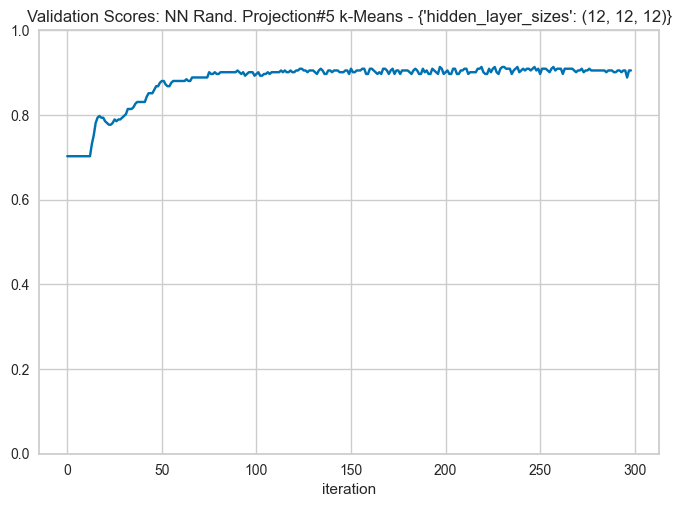

------------ Expectation Max.------------
(1728, 5)
(1728,)
(1728, 6)
Fitting 10 folds for each of 26 candidates, totalling 260 fits
Best Parameters:
 {'hidden_layer_sizes': (13, 13, 13)}
Best Estimators:
 MLPClassifier(early_stopping=True, hidden_layer_sizes=(13, 13, 13),
              max_iter=1000, n_iter_no_change=100, random_state=1,
              validation_fraction=0.2)
F1 Score:  0.8829149584172847
Training Accuracy:  0.9007444168734491
Testing Accuracy:  0.8863198458574181
Confusion Matrix
[[348  15   0   0]
 [ 28  82   2   3]
 [  2   4  12   3]
 [  0   2   0  18]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       363
           1       0.80      0.71      0.75       115
           2       0.86      0.57      0.69        21
           3       0.75      0.90      0.82        20

    accuracy                           0.89       519
   macro avg       0.83      0.79      0.80       519
weighted avg     

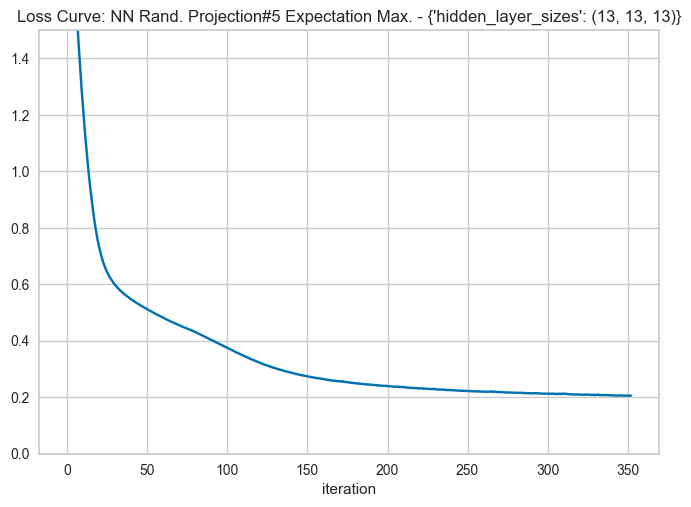

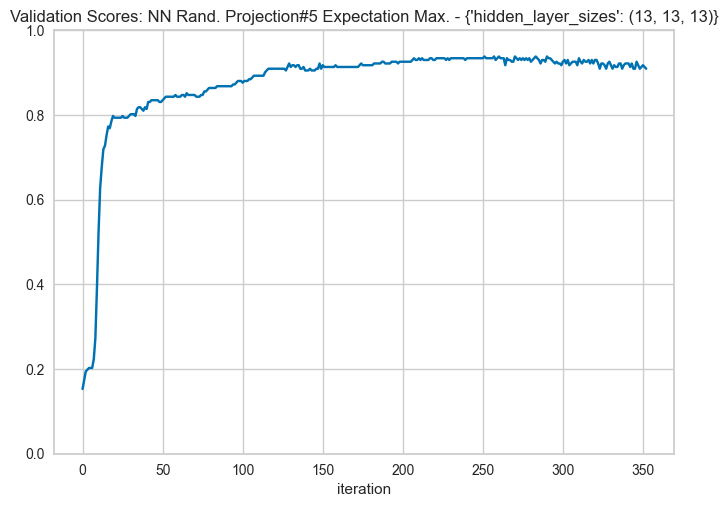

=================== TruncatedSVD#3 =====================
------------ k-Means------------
(1728, 3)
(1728,)
(1728, 4)
Fitting 10 folds for each of 26 candidates, totalling 260 fits
Best Parameters:
 {'hidden_layer_sizes': (9, 9, 9)}
Best Estimators:
 MLPClassifier(early_stopping=True, hidden_layer_sizes=(9, 9, 9), max_iter=1000,
              n_iter_no_change=100, random_state=1, validation_fraction=0.2)
F1 Score:  0.8016160287790146
Training Accuracy:  0.8395368072787428
Testing Accuracy:  0.8034682080924855
Confusion Matrix
[[324  31   8   0]
 [ 39  73   3   0]
 [  7   1   8   5]
 [  0   7   1  12]]
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       363
           1       0.65      0.63      0.64       115
           2       0.40      0.38      0.39        21
           3       0.71      0.60      0.65        20

    accuracy                           0.80       519
   macro avg       0.66      0.63      0.64

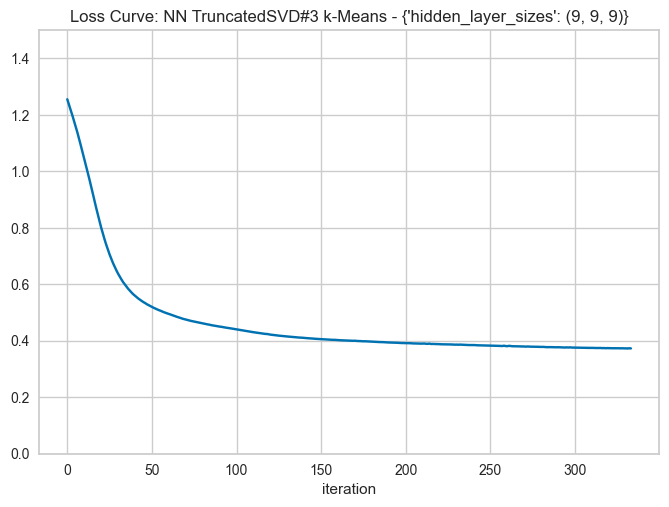

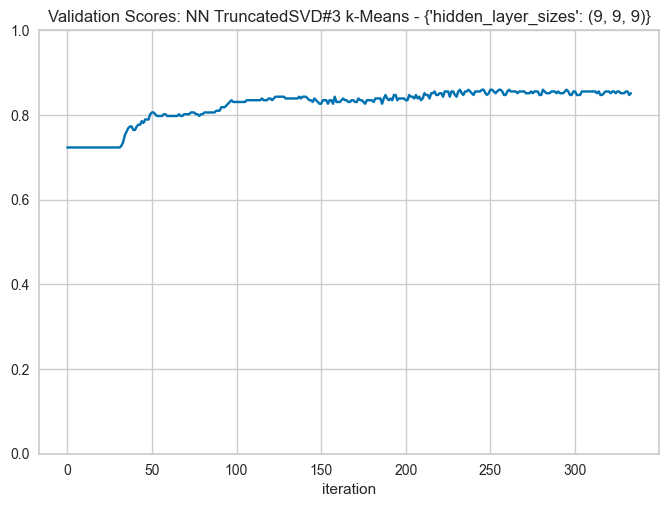

------------ Expectation Max.------------
(1728, 3)
(1728,)
(1728, 4)
Fitting 10 folds for each of 26 candidates, totalling 260 fits
Best Parameters:
 {'hidden_layer_sizes': (13, 13)}
Best Estimators:
 MLPClassifier(early_stopping=True, hidden_layer_sizes=(13, 13), max_iter=1000,
              n_iter_no_change=100, random_state=1, validation_fraction=0.2)
F1 Score:  0.8068523250801621
Training Accuracy:  0.8320926385442514
Testing Accuracy:  0.8131021194605009
Confusion Matrix
[[334  22   7   0]
 [ 45  67   2   1]
 [  7   1   9   4]
 [  0   8   0  12]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       363
           1       0.68      0.58      0.63       115
           2       0.50      0.43      0.46        21
           3       0.71      0.60      0.65        20

    accuracy                           0.81       519
   macro avg       0.69      0.63      0.66       519
weighted avg       0.80      0.81      

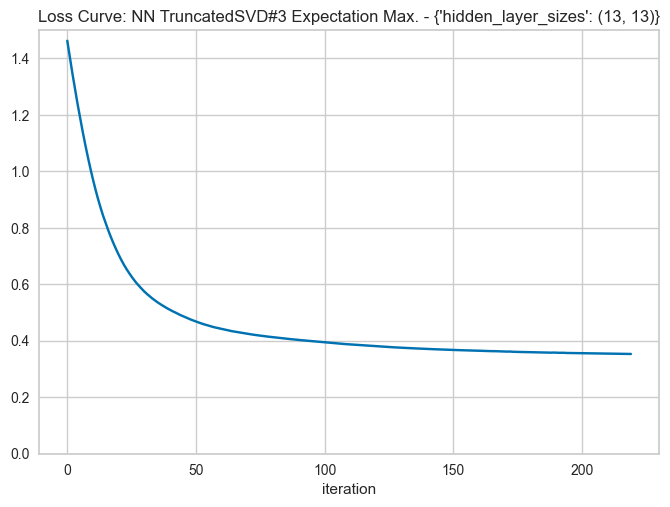

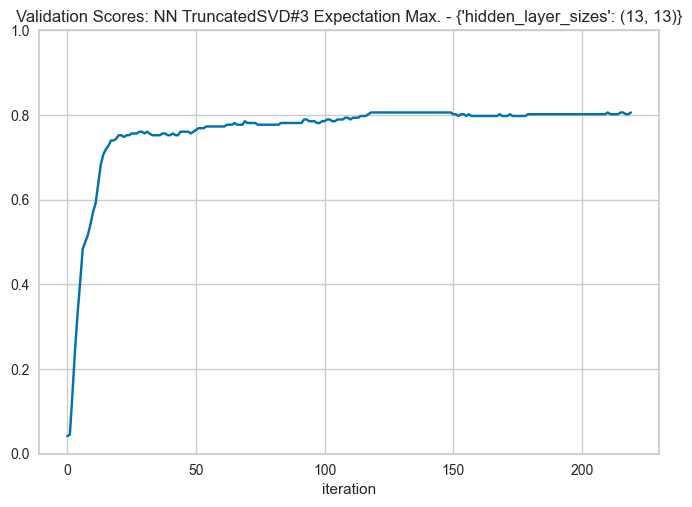

CPU times: user 8min 5s, sys: 4.65 s, total: 8min 9s
Wall time: 8min 6s


In [104]:
%%time
from sklearn.model_selection import GridSearchCV

num_class = 4
chosen = [2,5,5,3]
dr = [f'PCA#{chosen[0]}', f'ICA#{chosen[1]}', f'Rand. Projection#{chosen[2]}', f'TruncatedSVD#{chosen[3]}']
dataset = [X_transformed['PCA'][chosen[0]],
            X_transformed['ICA'][chosen[1]],
            X_transformed['Rand. Projection'][chosen[2]],
            X_transformed['TruncatedSVD'][chosen[3]]
            ]
cl = ['k-Means', 'Expectation Max.']

for i, x_t in enumerate(dataset):
    print(f"=================== {dr[i]} =====================")
    
    for j, c in enumerate(cl):
        print(f"------------ {c}------------")
        if j == 0:
            clf = KMeans(n_clusters= num_class, random_state=42)  
        else:
            clf = GaussianMixture(n_components=num_class,covariance_type='spherical', max_iter=no_iter, init_params= 'kmeans', random_state=42)
        clf.fit(x_t)
        y_pred = clf.predict(x_t)
        print(x_t.shape)
        print(y_pred.shape)
        new_x_t = np.c_[x_t, y_pred]
        print(new_x_t.shape)
        x_train, x_test, y_train, y_test = train_test_split(new_x_t, y, test_size=0.3,random_state=42, stratify=y)
        # Parameter Grid
        param_grid = {'hidden_layer_sizes': [(n,n) for n in range(2,15)] + [(n,n,n) for n in range(2,15)]}

        # Make grid search classifier
        clf_grid = GridSearchCV(MLPClassifier(max_iter=1000, early_stopping=True,activation = 'relu',
                            solver='adam',random_state=1, validation_fraction=0.2, n_iter_no_change=100), param_grid, verbose=1, cv=10)

        # Train the classifier
        clf_grid.fit(x_train, y_train)

        y_pred = clf_grid.predict(x_test)
        print("Best Parameters:\n", clf_grid.best_params_)
        print("Best Estimators:\n", clf_grid.best_estimator_)
        y_pred = clf_grid.best_estimator_.predict(x_test)

        print("F1 Score: ", f1_score(y_test,y_pred, average='weighted'))
        print("Training Accuracy: ", clf_grid.best_estimator_.score(x_train, y_train))
        print("Testing Accuracy: ", clf_grid.best_estimator_.score(x_test, y_test))
        print("Confusion Matrix")
        print(confusion_matrix(y_test, y_pred))
        print("Classification Report")
        print(classification_report(y_test,y_pred))
        print("Cross Validation Score")
        print(cross_val_score(clf_grid.best_estimator_, x, y, cv=10, scoring='f1_weighted'))
        print("Best Params : ", clf_grid.best_params_)
        plt.plot(clf_grid.best_estimator_.loss_curve_)
        plt.title(f"Loss Curve: NN {dr[i]} {c} - {clf_grid.best_params_}")
        plt.xlabel("Log Loss")
        plt.ylim(0,1.5)
        plt.xlabel("iteration")
        plt.show()

        plt.plot(clf_grid.best_estimator_.validation_scores_)
        plt.title(f"Validation Scores: NN {dr[i]} {c} - {clf_grid.best_params_}")
        plt.xlabel("Validation score")
        plt.ylim(0,1)
        plt.xlabel("iteration")
        plt.show()
